In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)


In [3]:
# Load the theme timeseries data (now includes year column)
df = pd.read_csv('theme_timeseries.csv')
print(f"Total rows: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nYear range: {df['year'].min()} - {df['year'].max()}")
print(f"\nThemes: {sorted(df['theme'].unique())}")
df.head(10)


Total rows: 1609

Columns: ['season', 'episode_number', 'episode_name', 'episode_order', 'year', 'theme', 'count']

Year range: 1997 - 2017

Themes: ['Abortion', 'Cancel Culture Free Speech', 'Climate Change', 'Criminal Justice Reform', 'Drug Policy', 'Education Reform', 'Gun Control', 'Healthcare Reform', 'Immigration', 'Income Inequality', 'Inflation Cost of Living', 'Iraq Afghanistan Wars', 'LGBTQ Rights', 'Middle East Conflict', 'Minimum Wage Labor', 'Race Civil Rights', 'Russia', 'Social Security Medicare', 'Tax Policy', 'Technology Privacy', 'Terrorism', 'Trade Policy', 'Unemployment Jobs', 'Voting Rights Election Security']


season  episode_number                episode_name  episode_order  year  \
0       1               1  Cartman Gets an Anal Probe              1  1997   
1       1               1  Cartman Gets an Anal Probe              1  1997   
2       1               1  Cartman Gets an Anal Probe              1  1997   
3       1               1  Cartman Gets an Anal Probe              1  1997   
4       1               1  Cartman Gets an Anal Probe              1  1997   
5       1               1  Cartman Gets an Anal Probe              1  1997   
6       1               2            Weight Gain 4000              2  1997   
7       1               2            Weight Gain 4000              2  1997   
8       1               2            Weight Gain 4000              2  1997   
9       1               2            Weight Gain 4000              2  1997   

                     theme  count  
0                 Abortion      6  
1  Criminal Justice Reform      1  
2              Drug Policy      4  
3              Gun Control      1  
4        Income Inequality      2  
5             LGBTQ Rights      1  
6                 Abortion      1  
7           Climate Change      3  
8  Criminal Justice Reform      3  
9              Drug Policy      1

In [4]:
# Verify year column is present and check season-to-year mapping
print("Season to Year Mapping (from CSV):")
season_year_mapping = df[['season', 'year']].drop_duplicates().sort_values('season')
for _, row in season_year_mapping.iterrows():
    print(f"  Season {int(row['season']):2d}: {int(row['year'])}")

print(f"\nYear column already loaded from CSV!")
df.head(10)


Season to Year Mapping (from CSV):
  Season  1: 1997
  Season  2: 1998
  Season  3: 1999
  Season  4: 2000
  Season  5: 2001
  Season  6: 2002
  Season  7: 2003
  Season  8: 2004
  Season  9: 2005
  Season 10: 2006
  Season 11: 2007
  Season 12: 2008
  Season 13: 2009
  Season 14: 2010
  Season 15: 2011
  Season 16: 2012
  Season 17: 2013
  Season 18: 2014
  Season 19: 2015
  Season 20: 2016
  Season 21: 2017

Year column already loaded from CSV!


season  episode_number                episode_name  episode_order  year  \
0       1               1  Cartman Gets an Anal Probe              1  1997   
1       1               1  Cartman Gets an Anal Probe              1  1997   
2       1               1  Cartman Gets an Anal Probe              1  1997   
3       1               1  Cartman Gets an Anal Probe              1  1997   
4       1               1  Cartman Gets an Anal Probe              1  1997   
5       1               1  Cartman Gets an Anal Probe              1  1997   
6       1               2            Weight Gain 4000              2  1997   
7       1               2            Weight Gain 4000              2  1997   
8       1               2            Weight Gain 4000              2  1997   
9       1               2            Weight Gain 4000              2  1997   

                     theme  count  
0                 Abortion      6  
1  Criminal Justice Reform      1  
2              Drug Policy      4  
3              Gun Control      1  
4        Income Inequality      2  
5             LGBTQ Rights      1  
6                 Abortion      1  
7           Climate Change      3  
8  Criminal Justice Reform      3  
9              Drug Policy      1

In [5]:
# Aggregate by season and theme
season_theme_counts = df.groupby(['season', 'theme'])['count'].sum().reset_index()
print(season_theme_counts.head(20))


    season                       theme  count
0        1                    Abortion     22
1        1  Cancel Culture Free Speech     10
2        1              Climate Change      5
3        1     Criminal Justice Reform     16
4        1                 Drug Policy     19
5        1            Education Reform      1
6        1                 Gun Control     19
7        1           Healthcare Reform      6
8        1                 Immigration      7
9        1           Income Inequality     24
10       1    Inflation Cost of Living      6
11       1       Iraq Afghanistan Wars      7
12       1                LGBTQ Rights     73
13       1           Race Civil Rights      6
14       1                      Russia      2
15       1    Social Security Medicare      1
16       1                  Tax Policy      2
17       1          Technology Privacy      3
18       2                    Abortion     53
19       2  Cancel Culture Free Speech      6


In [6]:
# Aggregate by year and theme
year_theme_counts = df.groupby(['year', 'theme'])['count'].sum().reset_index()
print("Year-based aggregation:")
print(year_theme_counts.head(20))


Year-based aggregation:
    year                       theme  count
0   1997                    Abortion     22
1   1997  Cancel Culture Free Speech     10
2   1997              Climate Change      5
3   1997     Criminal Justice Reform     16
4   1997                 Drug Policy     19
5   1997            Education Reform      1
6   1997                 Gun Control     19
7   1997           Healthcare Reform      6
8   1997                 Immigration      7
9   1997           Income Inequality     24
10  1997    Inflation Cost of Living      6
11  1997       Iraq Afghanistan Wars      7
12  1997                LGBTQ Rights     73
13  1997           Race Civil Rights      6
14  1997                      Russia      2
15  1997    Social Security Medicare      1
16  1997                  Tax Policy      2
17  1997          Technology Privacy      3
18  1998                    Abortion     53
19  1998  Cancel Culture Free Speech      6


In [7]:
# Get list of all themes sorted by total mentions
theme_totals = df.groupby('theme')['count'].sum().sort_values(ascending=False)
themes = theme_totals.index.tolist()
print(f"Number of themes: {len(themes)}")
print("\nThemes by total mentions:")
print(theme_totals)


Number of themes: 24

Themes by total mentions:
theme
Immigration                        672
LGBTQ Rights                       595
Criminal Justice Reform            504
Abortion                           319
Income Inequality                  296
Technology Privacy                 283
Cancel Culture Free Speech         274
Healthcare Reform                  268
Drug Policy                        198
Iraq Afghanistan Wars              193
Gun Control                        189
Race Civil Rights                  180
Minimum Wage Labor                 150
Terrorism                          133
Unemployment Jobs                   98
Inflation Cost of Living            94
Tax Policy                          90
Education Reform                    88
Middle East Conflict                82
Russia                              77
Social Security Medicare            66
Climate Change                      66
Voting Rights Election Security     39
Trade Policy                         6
Name: coun

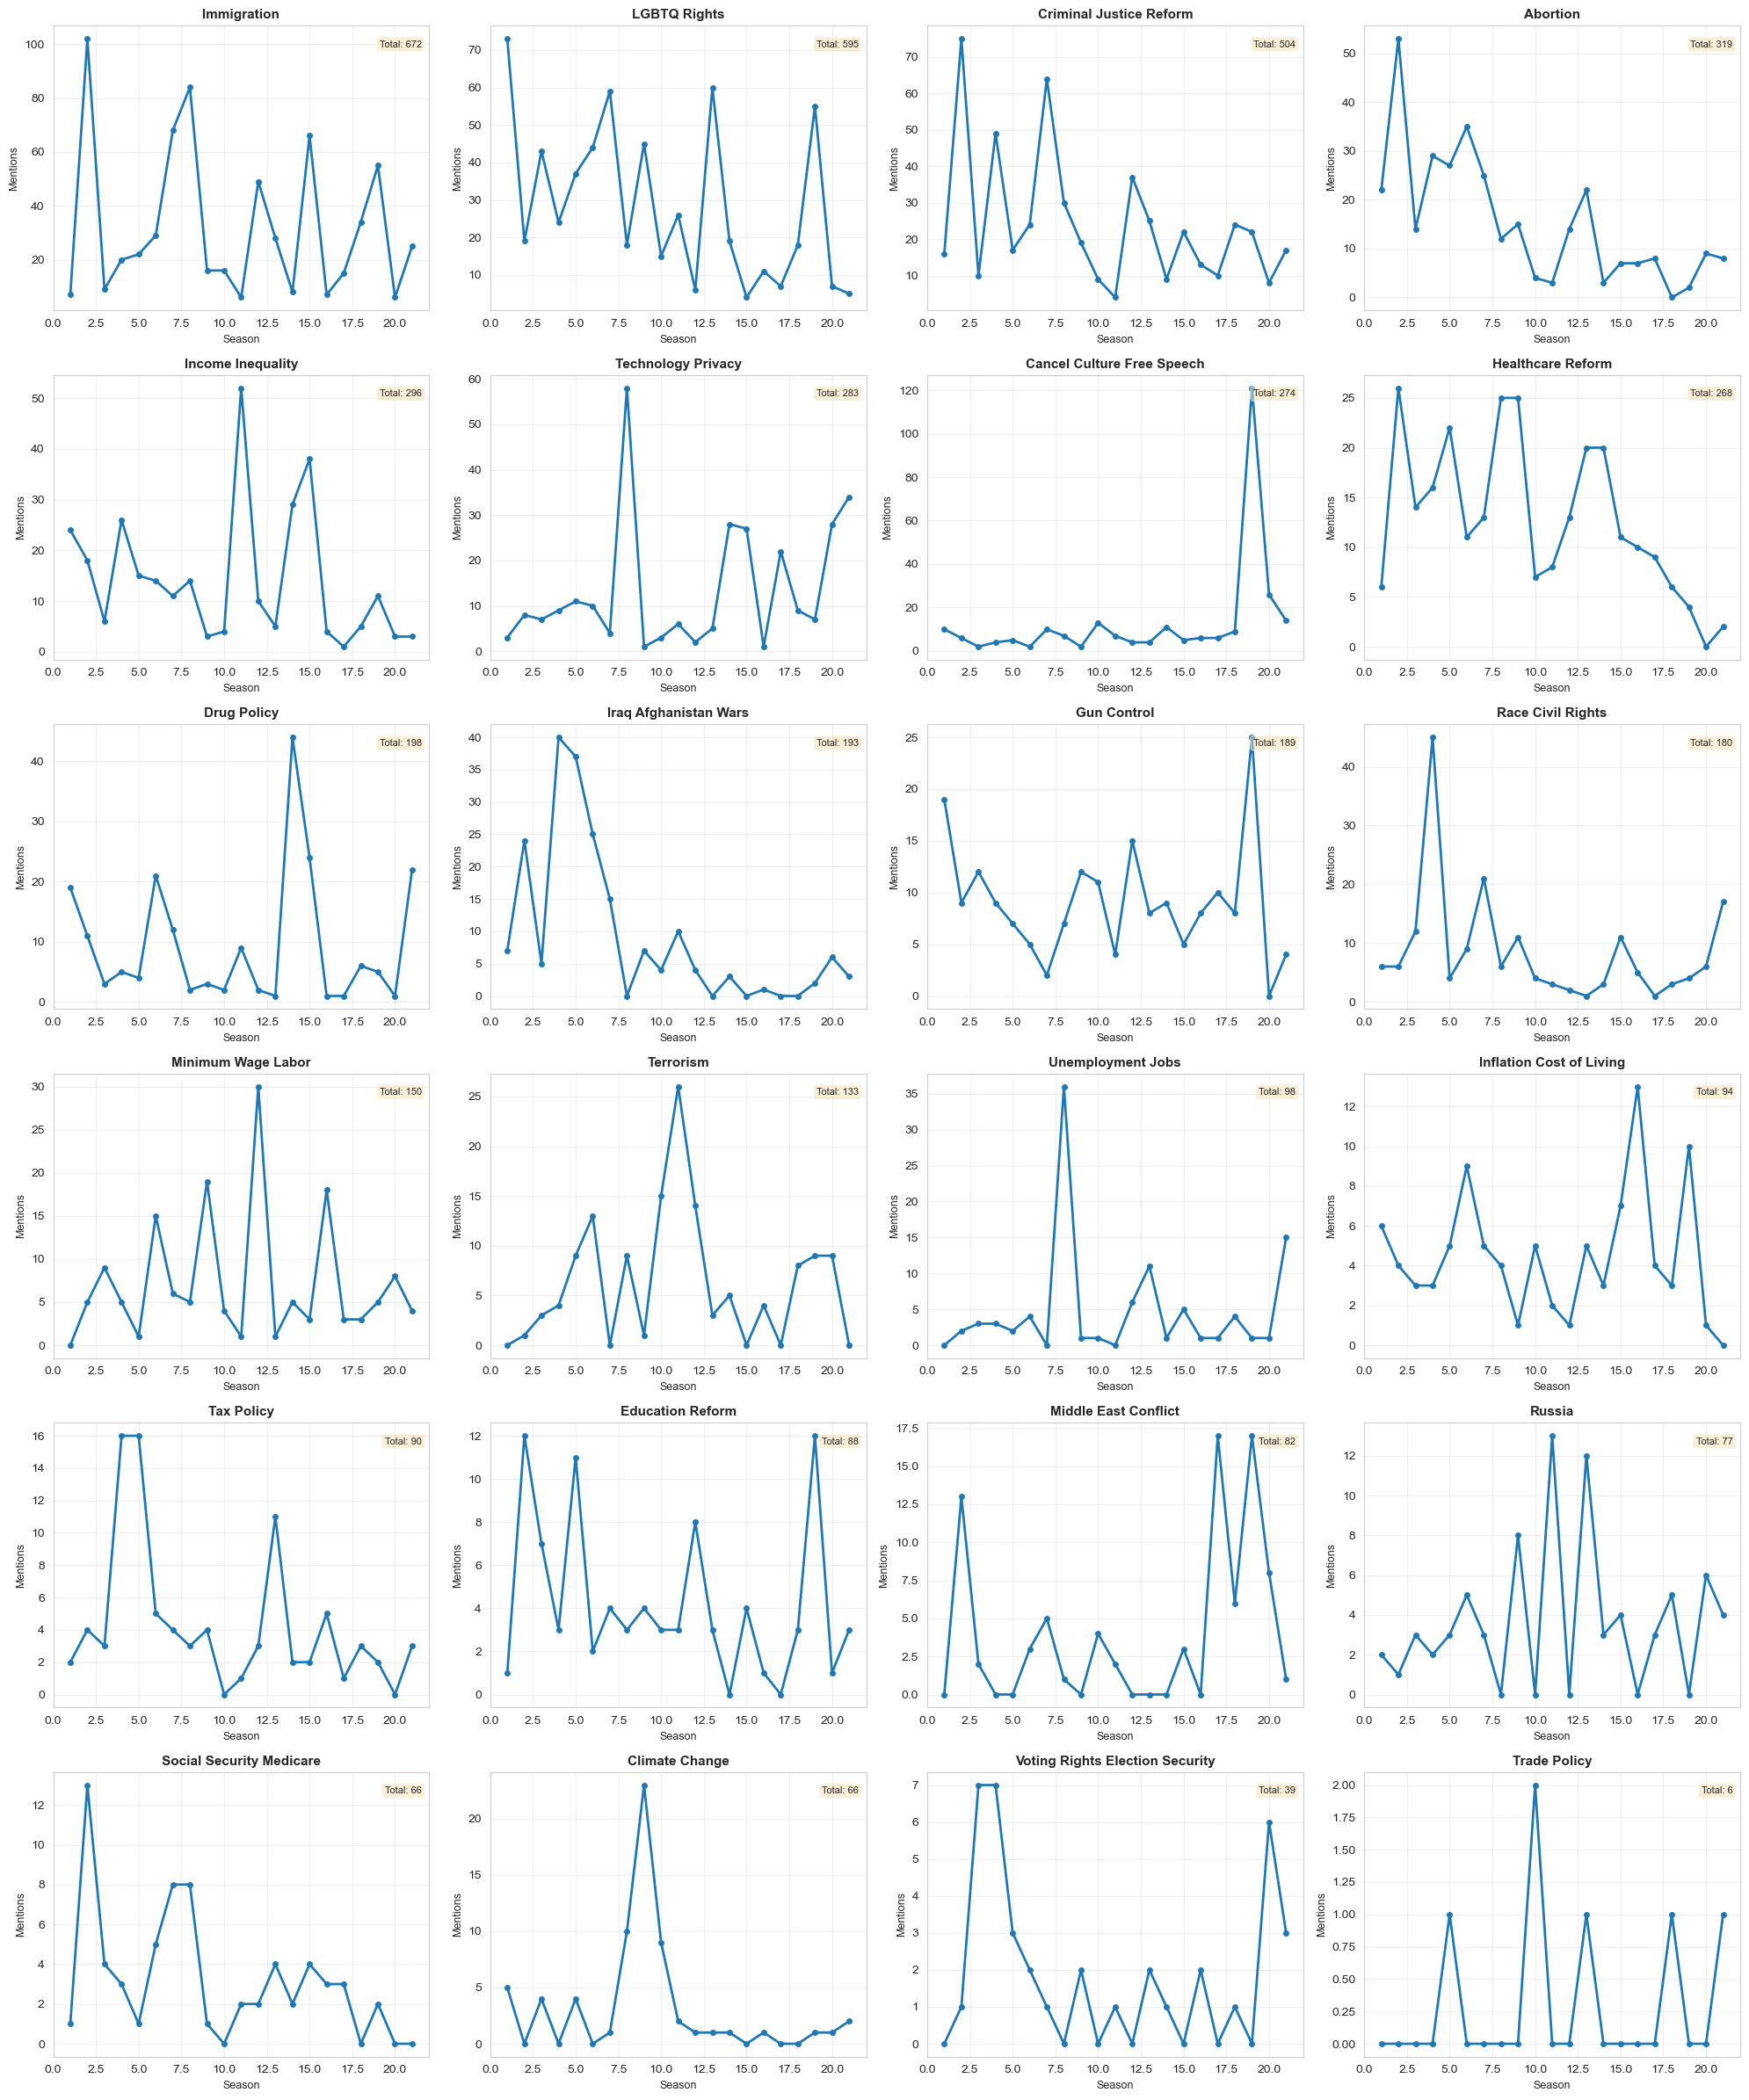

In [8]:
# Create individual line charts for each theme
fig, axes = plt.subplots(6, 4, figsize=(20, 24))
axes = axes.flatten()

for idx, theme in enumerate(themes):
    ax = axes[idx]
    
    # Get data for this theme
    theme_data = season_theme_counts[season_theme_counts['theme'] == theme]
    
    # Create complete season range (1-21) with zeros for missing seasons
    all_seasons = pd.DataFrame({'season': range(1, 22)})
    theme_data = all_seasons.merge(theme_data, on='season', how='left').fillna(0)
    
    # Plot
    ax.plot(theme_data['season'], theme_data['count'], marker='o', linewidth=2, markersize=4)
    ax.set_title(theme, fontsize=11, fontweight='bold')
    ax.set_xlabel('Season', fontsize=9)
    ax.set_ylabel('Mentions', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 22)
    
    # Add total count to title
    total = theme_totals[theme]
    ax.text(0.98, 0.95, f'Total: {int(total)}', 
            transform=ax.transAxes, 
            fontsize=8, 
            verticalalignment='top', 
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('themes_by_season.png', dpi=150, bbox_inches='tight')
plt.show()


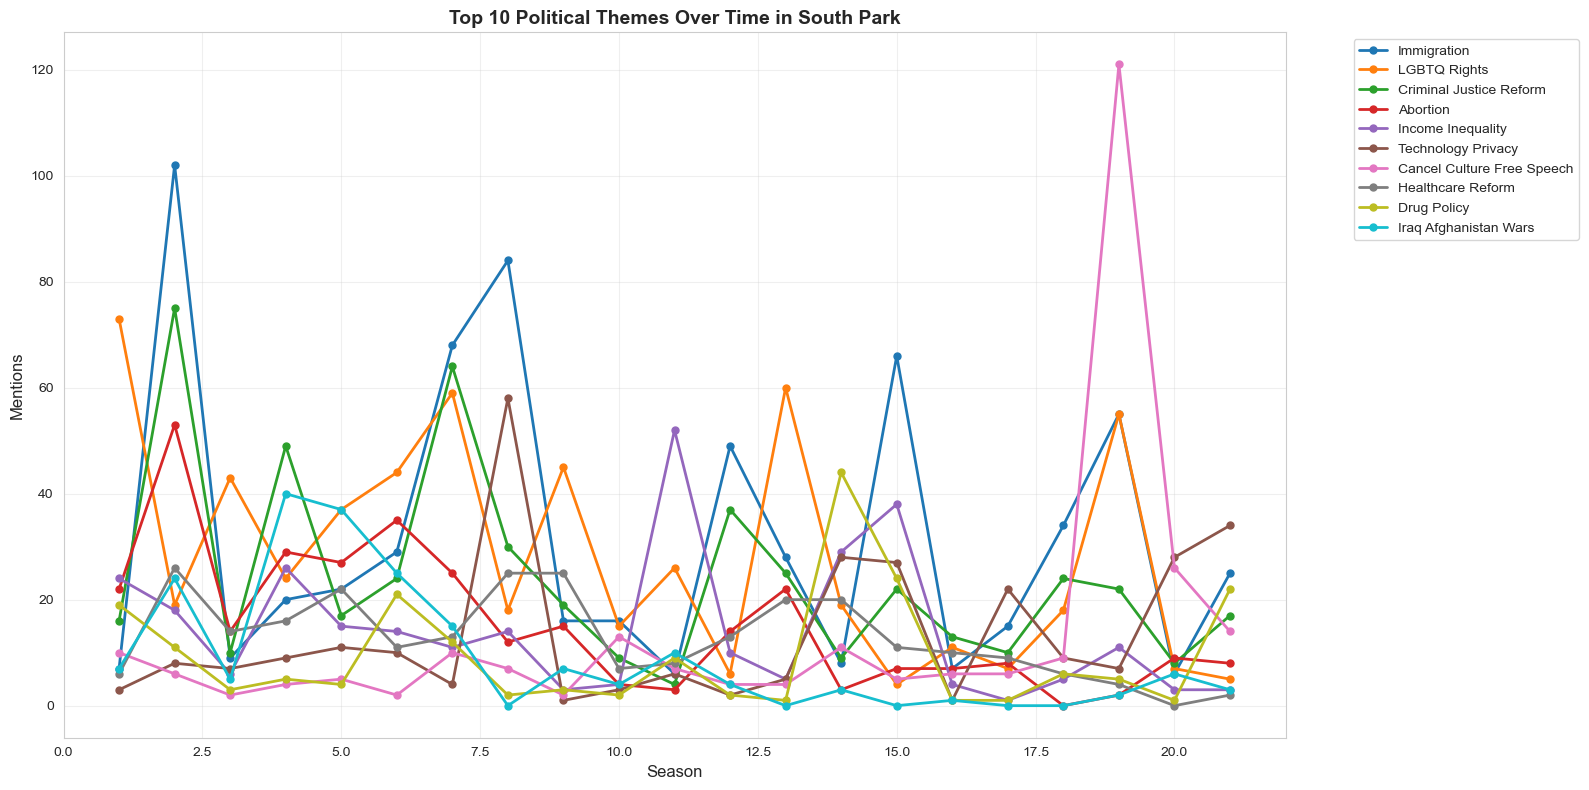

In [9]:
# Create a single chart with all themes (top 10 only for clarity)
top_10_themes = themes[:10]

plt.figure(figsize=(16, 8))
for theme in top_10_themes:
    theme_data = season_theme_counts[season_theme_counts['theme'] == theme]
    all_seasons = pd.DataFrame({'season': range(1, 22)})
    theme_data = all_seasons.merge(theme_data, on='season', how='left').fillna(0)
    plt.plot(theme_data['season'], theme_data['count'], marker='o', linewidth=2, label=theme, markersize=5)

plt.xlabel('Season', fontsize=12)
plt.ylabel('Mentions', fontsize=12)
plt.title('Top 10 Political Themes Over Time in South Park', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, 22)
plt.tight_layout()
plt.savefig('top10_themes_comparison.png', dpi=150, bbox_inches='tight')
plt.show()


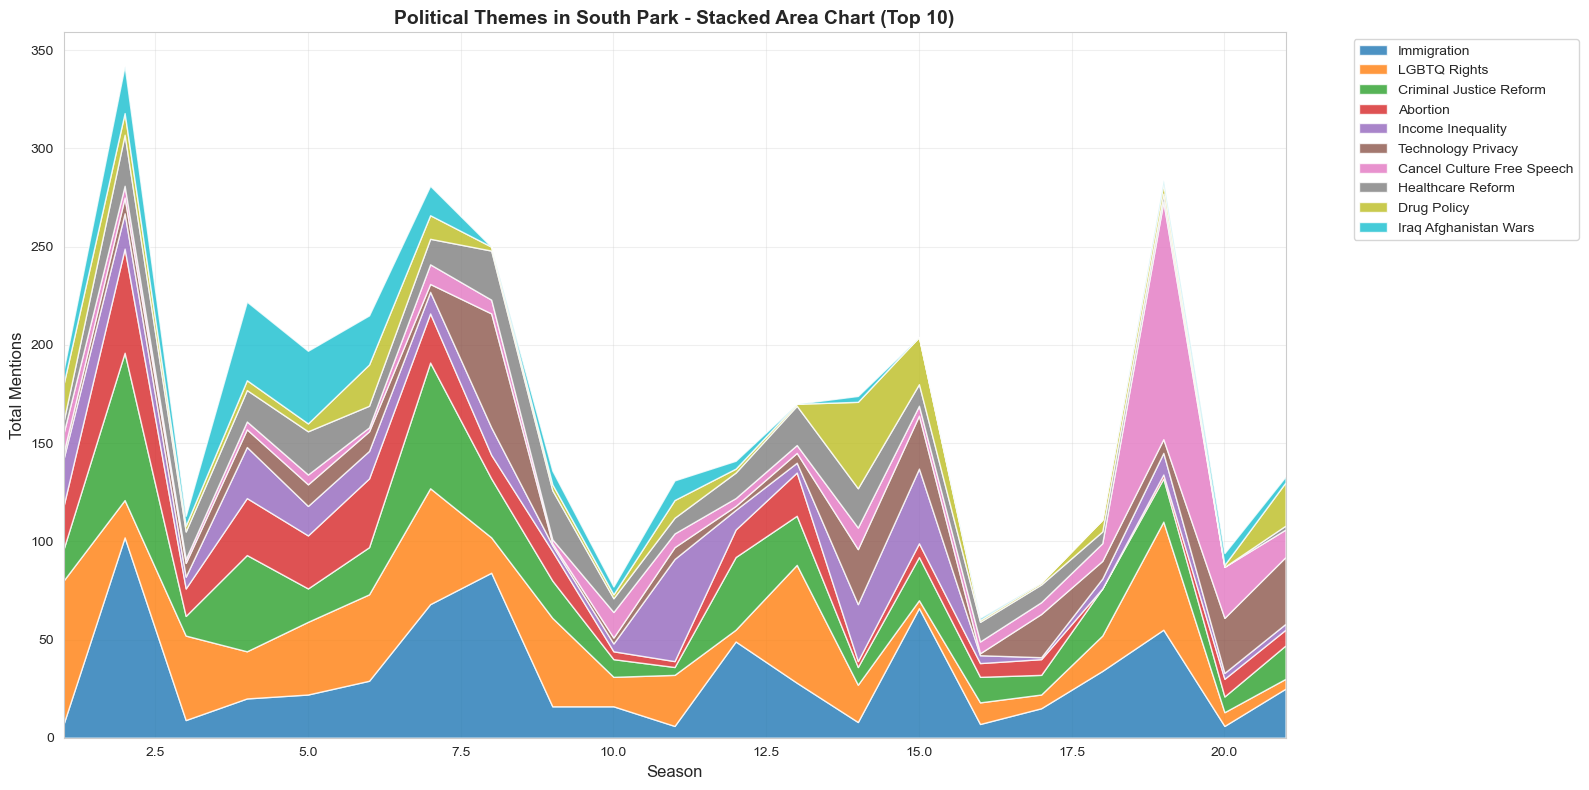

In [10]:
# Create a stacked area chart (river-style visualization)
# Pivot data for stacked area chart
pivot_data = season_theme_counts.pivot(index='season', columns='theme', values='count').fillna(0)

# Select top 10 themes for clearer visualization
pivot_top10 = pivot_data[top_10_themes]

plt.figure(figsize=(16, 8))
plt.stackplot(pivot_top10.index, 
              *[pivot_top10[col] for col in pivot_top10.columns],
              labels=pivot_top10.columns,
              alpha=0.8)

plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Mentions', fontsize=12)
plt.title('Political Themes in South Park - Stacked Area Chart (Top 10)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(1, 21)
plt.tight_layout()
plt.savefig('themes_stacked_area.png', dpi=150, bbox_inches='tight')
plt.show()


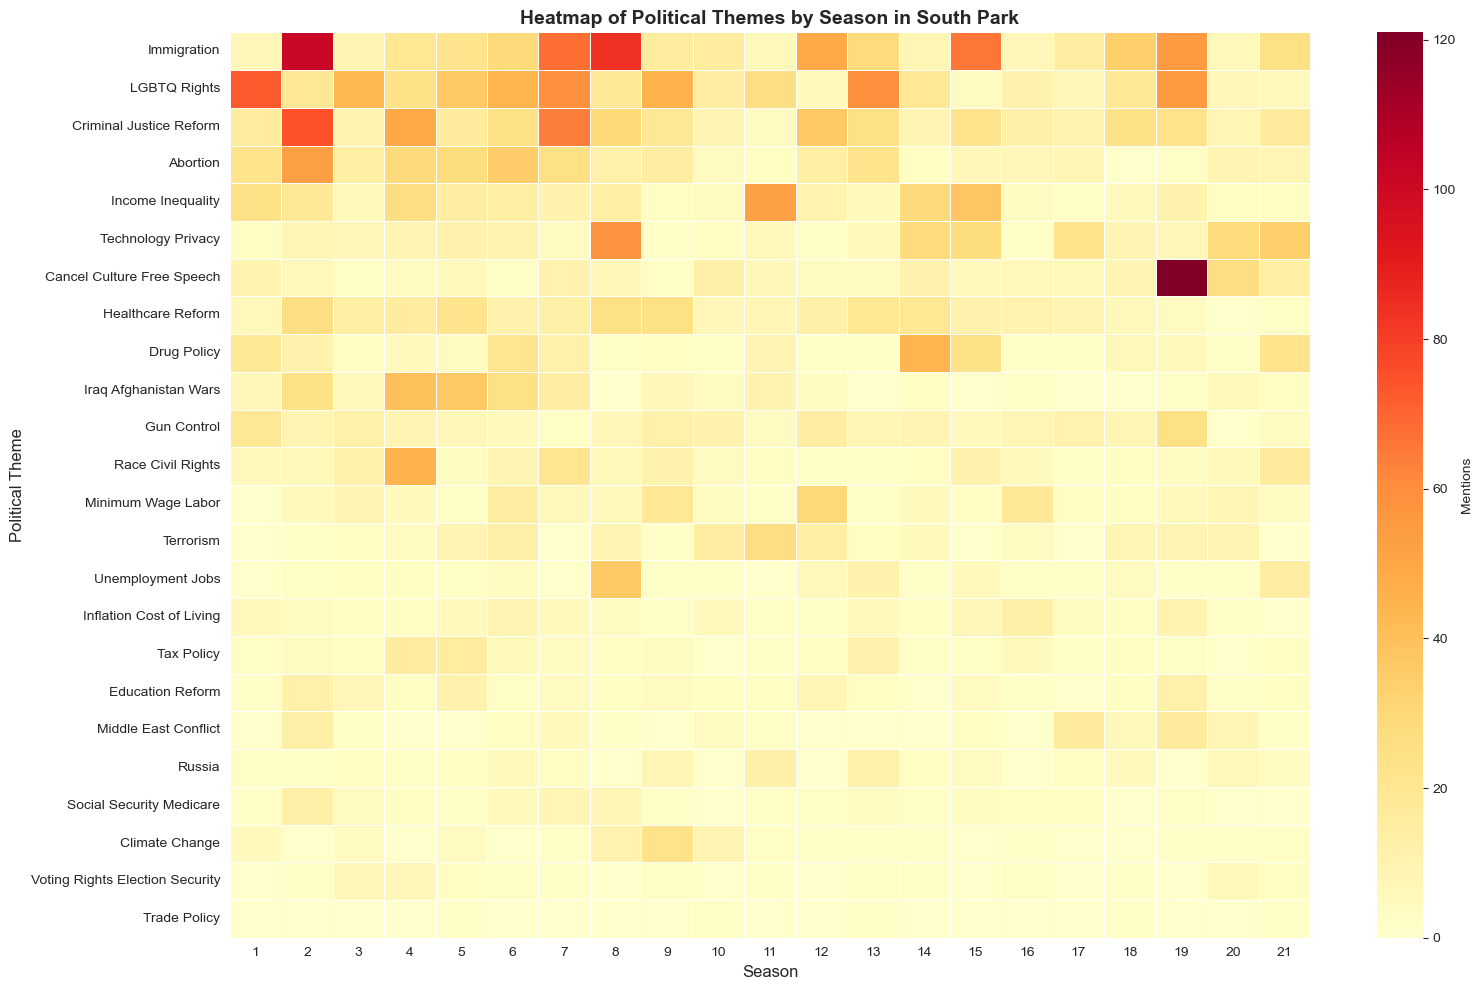

In [11]:
# Create a heatmap showing all themes across all seasons
plt.figure(figsize=(16, 10))

# Sort themes by total mentions for better visualization
theme_order = theme_totals.index.tolist()
pivot_sorted = pivot_data[theme_order].T

sns.heatmap(pivot_sorted, 
            cmap='YlOrRd', 
            cbar_kws={'label': 'Mentions'},
            linewidths=0.5,
            linecolor='white')

plt.xlabel('Season', fontsize=12)
plt.ylabel('Political Theme', fontsize=12)
plt.title('Heatmap of Political Themes by Season in South Park', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('themes_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()


---
## Year-Based Analysis
Visualizations using calendar years instead of seasons (Season 1 = 1997)


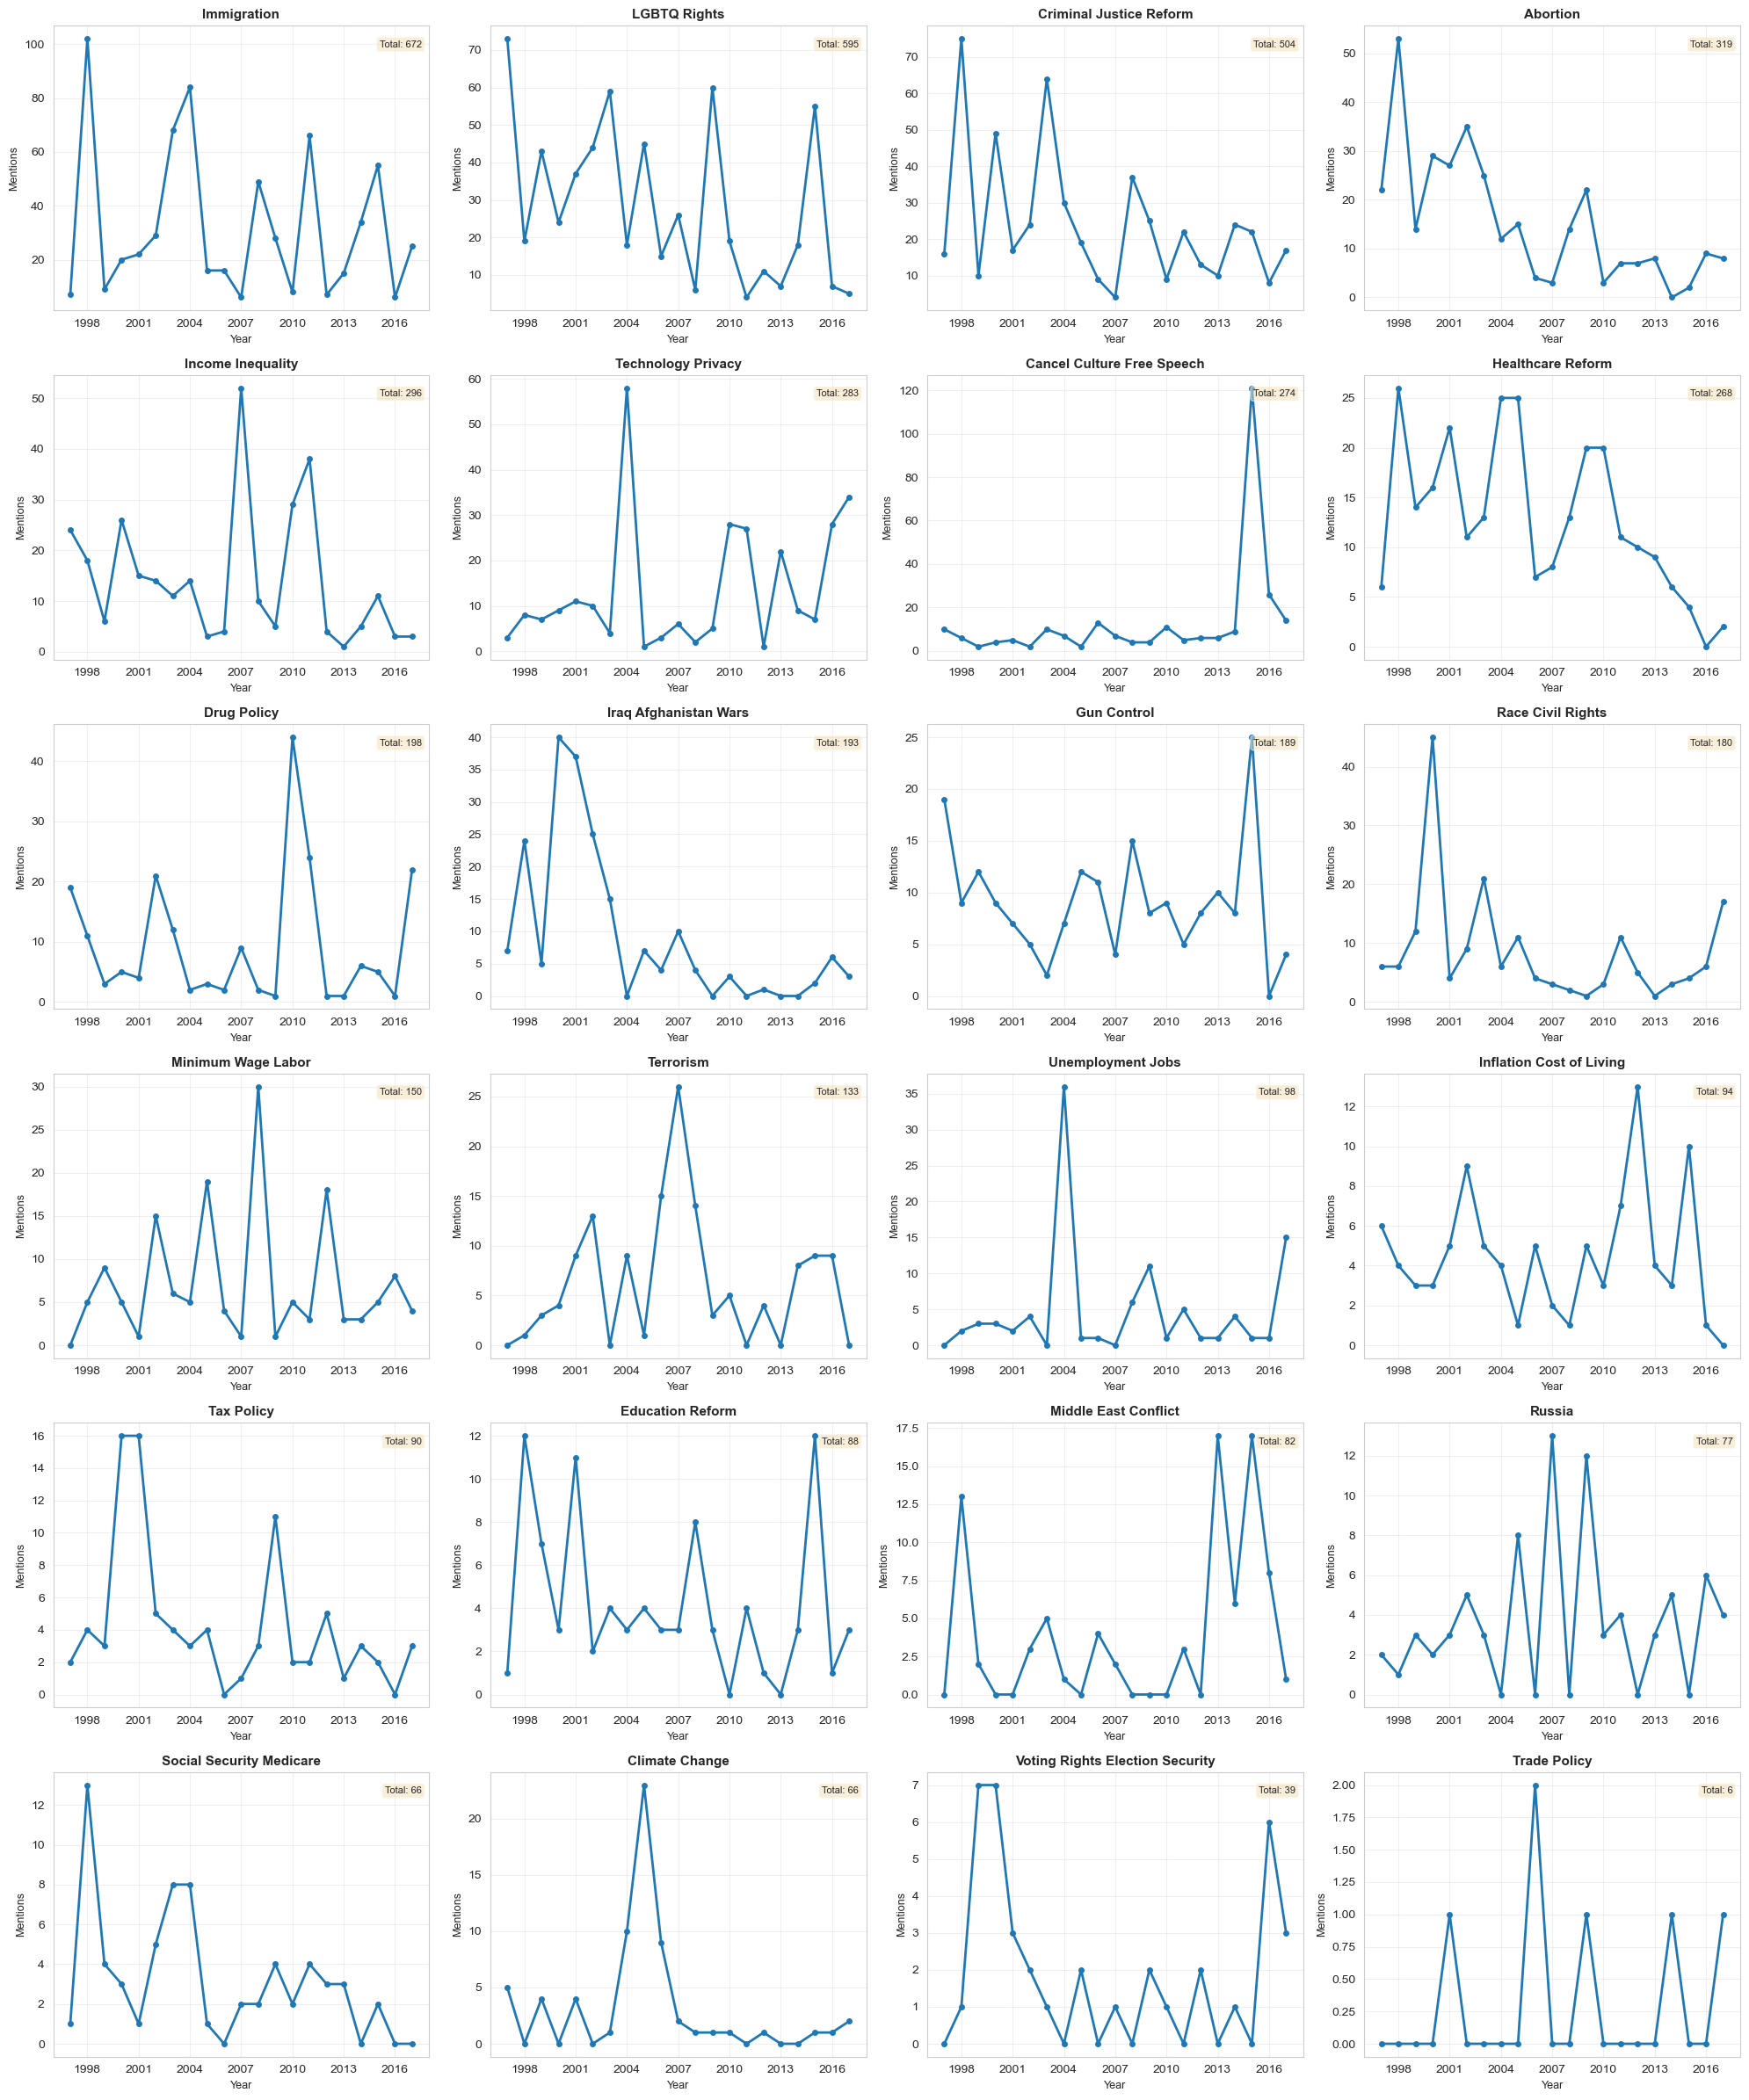

In [12]:
# Create individual line charts for each theme BY YEAR
fig, axes = plt.subplots(6, 4, figsize=(20, 24))
axes = axes.flatten()

for idx, theme in enumerate(themes):
    ax = axes[idx]
    
    # Get data for this theme
    theme_data = year_theme_counts[year_theme_counts['theme'] == theme]
    
    # Create complete year range (1997-2017) with zeros for missing years
    all_years = pd.DataFrame({'year': range(1997, 2018)})
    theme_data = all_years.merge(theme_data, on='year', how='left').fillna(0)
    
    # Plot
    ax.plot(theme_data['year'], theme_data['count'], marker='o', linewidth=2, markersize=4)
    ax.set_title(theme, fontsize=11, fontweight='bold')
    ax.set_xlabel('Year', fontsize=9)
    ax.set_ylabel('Mentions', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(1996, 2018)
    
    # Format x-axis to show only integer years
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Add total count to title
    total = theme_totals[theme]
    ax.text(0.98, 0.95, f'Total: {int(total)}', 
            transform=ax.transAxes, 
            fontsize=8, 
            verticalalignment='top', 
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('themes_by_year.png', dpi=150, bbox_inches='tight')
plt.show()


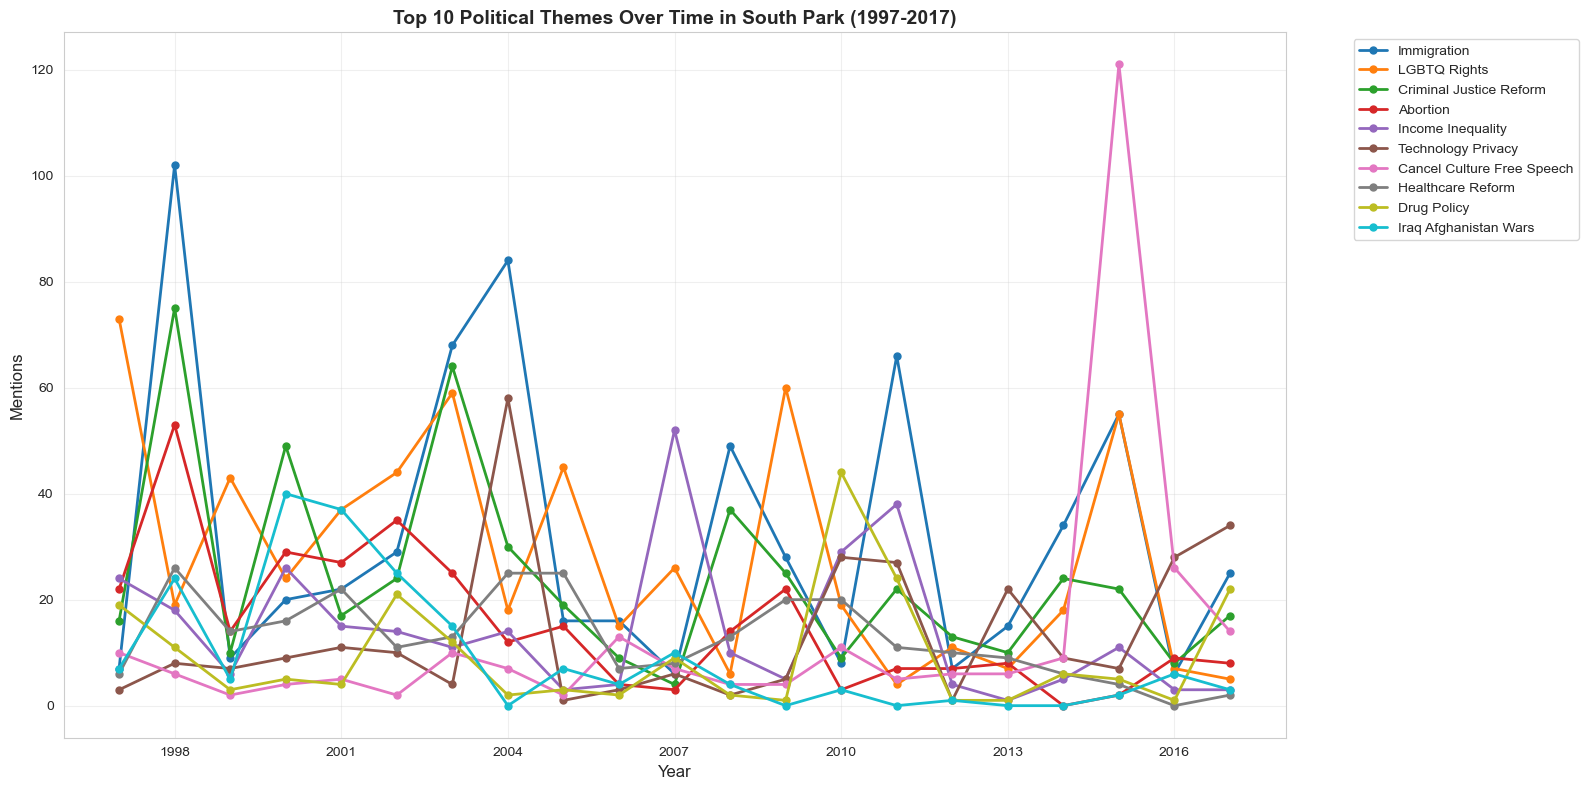

In [13]:
# Create a single chart with all themes BY YEAR (top 10 only for clarity)
plt.figure(figsize=(16, 8))
for theme in top_10_themes:
    theme_data = year_theme_counts[year_theme_counts['theme'] == theme]
    all_years = pd.DataFrame({'year': range(1997, 2018)})
    theme_data = all_years.merge(theme_data, on='year', how='left').fillna(0)
    plt.plot(theme_data['year'], theme_data['count'], marker='o', linewidth=2, label=theme, markersize=5)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Mentions', fontsize=12)
plt.title('Top 10 Political Themes Over Time in South Park (1997-2017)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(1996, 2018)

# Format x-axis to show only integer years
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig('top10_themes_by_year.png', dpi=150, bbox_inches='tight')
plt.show()


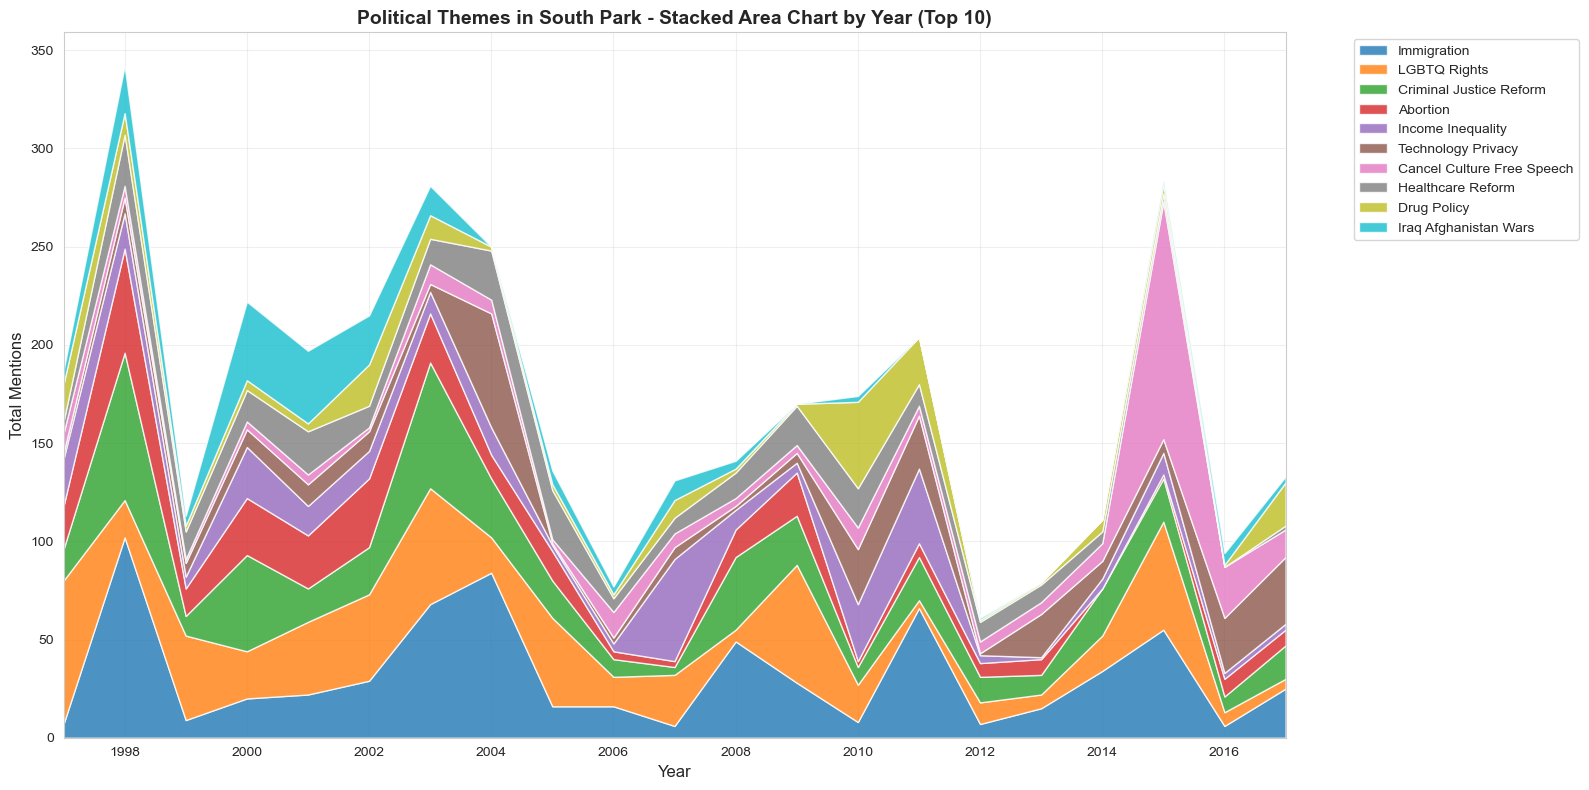

In [14]:
# Create a stacked area chart BY YEAR (river-style visualization)
# Pivot data for stacked area chart
pivot_data_year = year_theme_counts.pivot(index='year', columns='theme', values='count').fillna(0)

# Select top 10 themes for clearer visualization
pivot_top10_year = pivot_data_year[top_10_themes]

plt.figure(figsize=(16, 8))
plt.stackplot(pivot_top10_year.index, 
              *[pivot_top10_year[col] for col in pivot_top10_year.columns],
              labels=pivot_top10_year.columns,
              alpha=0.8)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Mentions', fontsize=12)
plt.title('Political Themes in South Park - Stacked Area Chart by Year (Top 10)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(1997, 2017)

# Format x-axis to show only integer years
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig('themes_stacked_area_year.png', dpi=150, bbox_inches='tight')
plt.show()


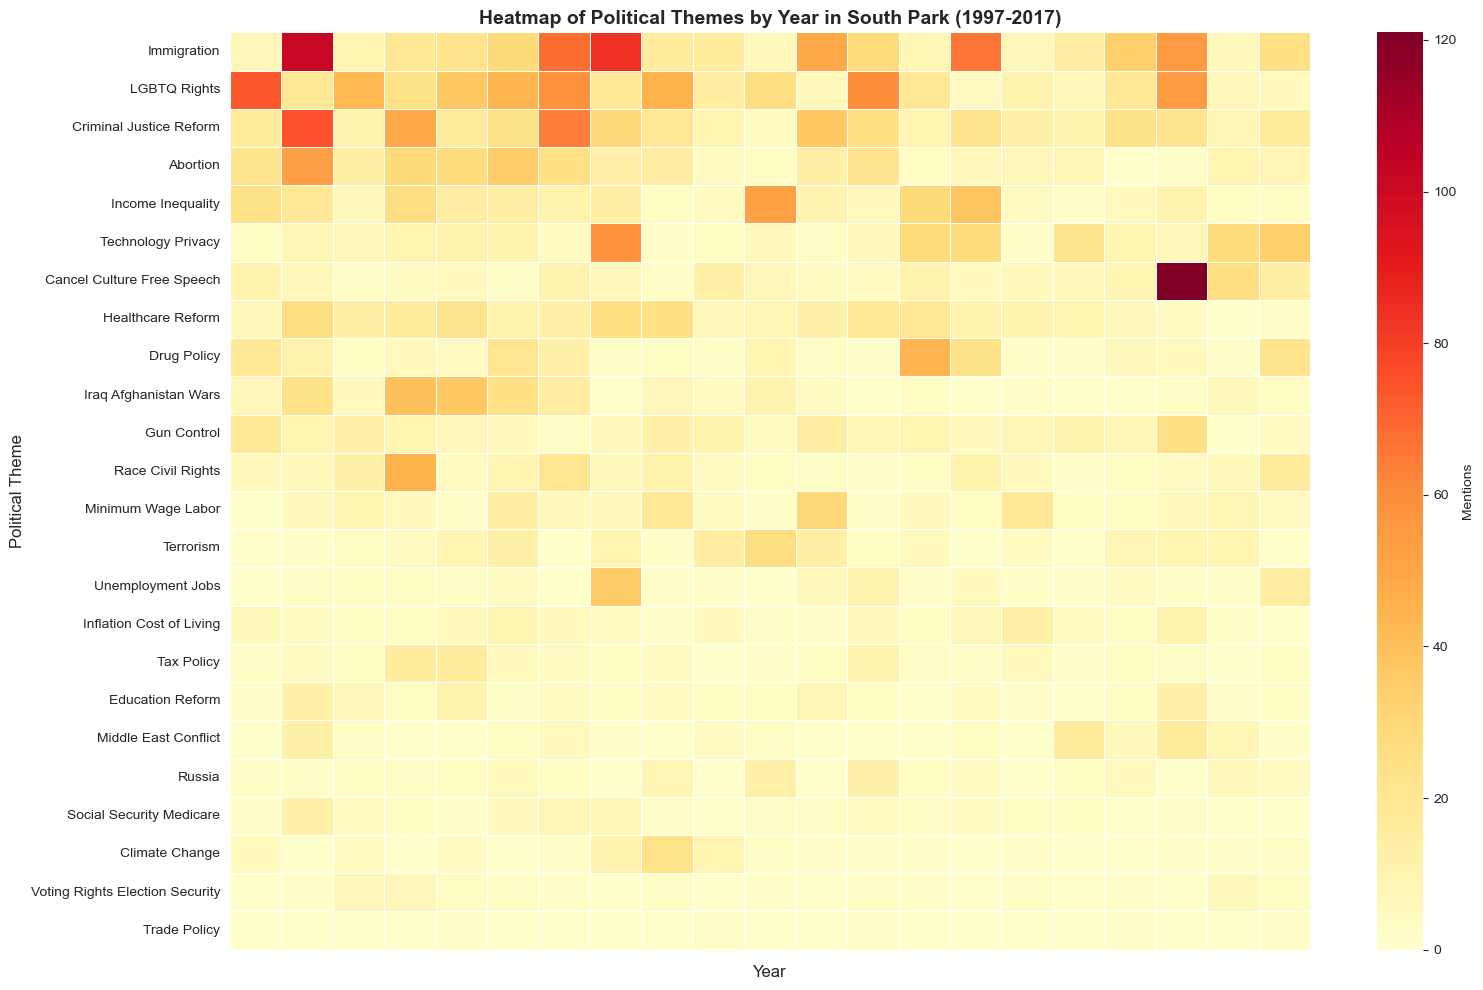

In [15]:
# Create a heatmap showing all themes BY YEAR
plt.figure(figsize=(16, 10))

# Sort themes by total mentions for better visualization
theme_order = theme_totals.index.tolist()
pivot_sorted_year = pivot_data_year[theme_order].T

ax = sns.heatmap(pivot_sorted_year, 
                 cmap='YlOrRd', 
                 cbar_kws={'label': 'Mentions'},
                 linewidths=0.5,
                 linecolor='white')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Political Theme', fontsize=12)
plt.title('Heatmap of Political Themes by Year in South Park (1997-2017)', fontsize=14, fontweight='bold')

# Format x-axis to show only integer years
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig('themes_heatmap_year.png', dpi=150, bbox_inches='tight')
plt.show()


In [16]:
# Verify data structure (year column now comes from source CSV)
print("Data structure verification:")
print(f"Columns: {df.columns.tolist()}")
print(f"Total rows: {len(df)}")
print(f"Year range: {df['year'].min()} - {df['year'].max()}")
print(f"Unique seasons: {sorted(df['season'].unique())}")

# Optional: Export a copy with year data for reference
year_based_export = df[['season', 'episode_number', 'episode_name', 'episode_order', 'year', 'theme', 'count']]
year_based_export.to_csv('theme_timeseries_with_year.csv', index=False)
print("\nExported copy to: theme_timeseries_with_year.csv")
year_based_export.head(20)


Data structure verification:
Columns: ['season', 'episode_number', 'episode_name', 'episode_order', 'year', 'theme', 'count']
Total rows: 1609
Year range: 1997 - 2017
Unique seasons: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

Exported copy to: theme_timeseries_with_year.csv


season  episode_number                    episode_name  episode_order  \
0        1               1      Cartman Gets an Anal Probe              1   
1        1               1      Cartman Gets an Anal Probe              1   
2        1               1      Cartman Gets an Anal Probe              1   
3        1               1      Cartman Gets an Anal Probe              1   
4        1               1      Cartman Gets an Anal Probe              1   
5        1               1      Cartman Gets an Anal Probe              1   
6        1               2                Weight Gain 4000              2   
7        1               2                Weight Gain 4000              2   
8        1               2                Weight Gain 4000              2   
9        1               2                Weight Gain 4000              2   
10       1               2                Weight Gain 4000              2   
11       1               2                Weight Gain 4000              2   
12       1               2                Weight Gain 4000              2   
13       1               2                Weight Gain 4000              2   
14       1               3                         Volcano              3   
15       1               3                         Volcano              3   
16       1               3                         Volcano              3   
17       1               4  Big Gay Al's Big Gay Boat Ride              4   
18       1               4  Big Gay Al's Big Gay Boat Ride              4   
19       1               4  Big Gay Al's Big Gay Boat Ride              4   

    year                       theme  count  
0   1997                    Abortion      6  
1   1997     Criminal Justice Reform      1  
2   1997                 Drug Policy      4  
3   1997                 Gun Control      1  
4   1997           Income Inequality      2  
5   1997                LGBTQ Rights      1  
6   1997                    Abortion      1  
7   1997              Climate Change      3  
8   1997     Criminal Justice Reform      3  
9   1997                 Drug Policy      1  
10  1997                 Gun Control      8  
11  1997                LGBTQ Rights      3  
12  1997           Race Civil Rights      1  
13  1997                      Russia      1  
14  1997                    Abortion      1  
15  1997                 Gun Control      7  
16  1997       Iraq Afghanistan Wars      1  
17  1997  Cancel Culture Free Speech      1  
18  1997    Inflation Cost of Living      1  
19  1997                LGBTQ Rights     44

In [17]:
# Year-based summary statistics
print("=" * 80)
print("YEAR-BASED SUMMARY STATISTICS")
print("=" * 80)

print("\n\nThemes by Peak Year Activity:")
for theme in top_10_themes:
    theme_data = year_theme_counts[year_theme_counts['theme'] == theme]
    peak_year = theme_data.loc[theme_data['count'].idxmax()]
    print(f"{theme:40s}: {int(peak_year['year'])} ({int(peak_year['count'])} mentions)")

print("\n\nYearly totals (all themes combined):")
yearly_totals = year_theme_counts.groupby('year')['count'].sum()
for year, total in yearly_totals.items():
    print(f"  {year}: {int(total):4d} total political theme mentions")

print("\n" + "=" * 80)


YEAR-BASED SUMMARY STATISTICS


Themes by Peak Year Activity:
Immigration                             : 1998 (102 mentions)
LGBTQ Rights                            : 1997 (73 mentions)
Criminal Justice Reform                 : 1998 (75 mentions)
Abortion                                : 1998 (53 mentions)
Income Inequality                       : 2007 (52 mentions)
Technology Privacy                      : 2004 (58 mentions)
Cancel Culture Free Speech              : 2015 (121 mentions)
Healthcare Reform                       : 1998 (26 mentions)
Drug Policy                             : 2010 (44 mentions)
Iraq Afghanistan Wars                   : 2000 (40 mentions)


Yearly totals (all themes combined):
  1997:  229 total political theme mentions
  1998:  413 total political theme mentions
  1999:  185 total political theme mentions
  2000:  322 total political theme mentions
  2001:  264 total political theme mentions
  2002:  292 total political theme mentions
  2003:  341 total poli

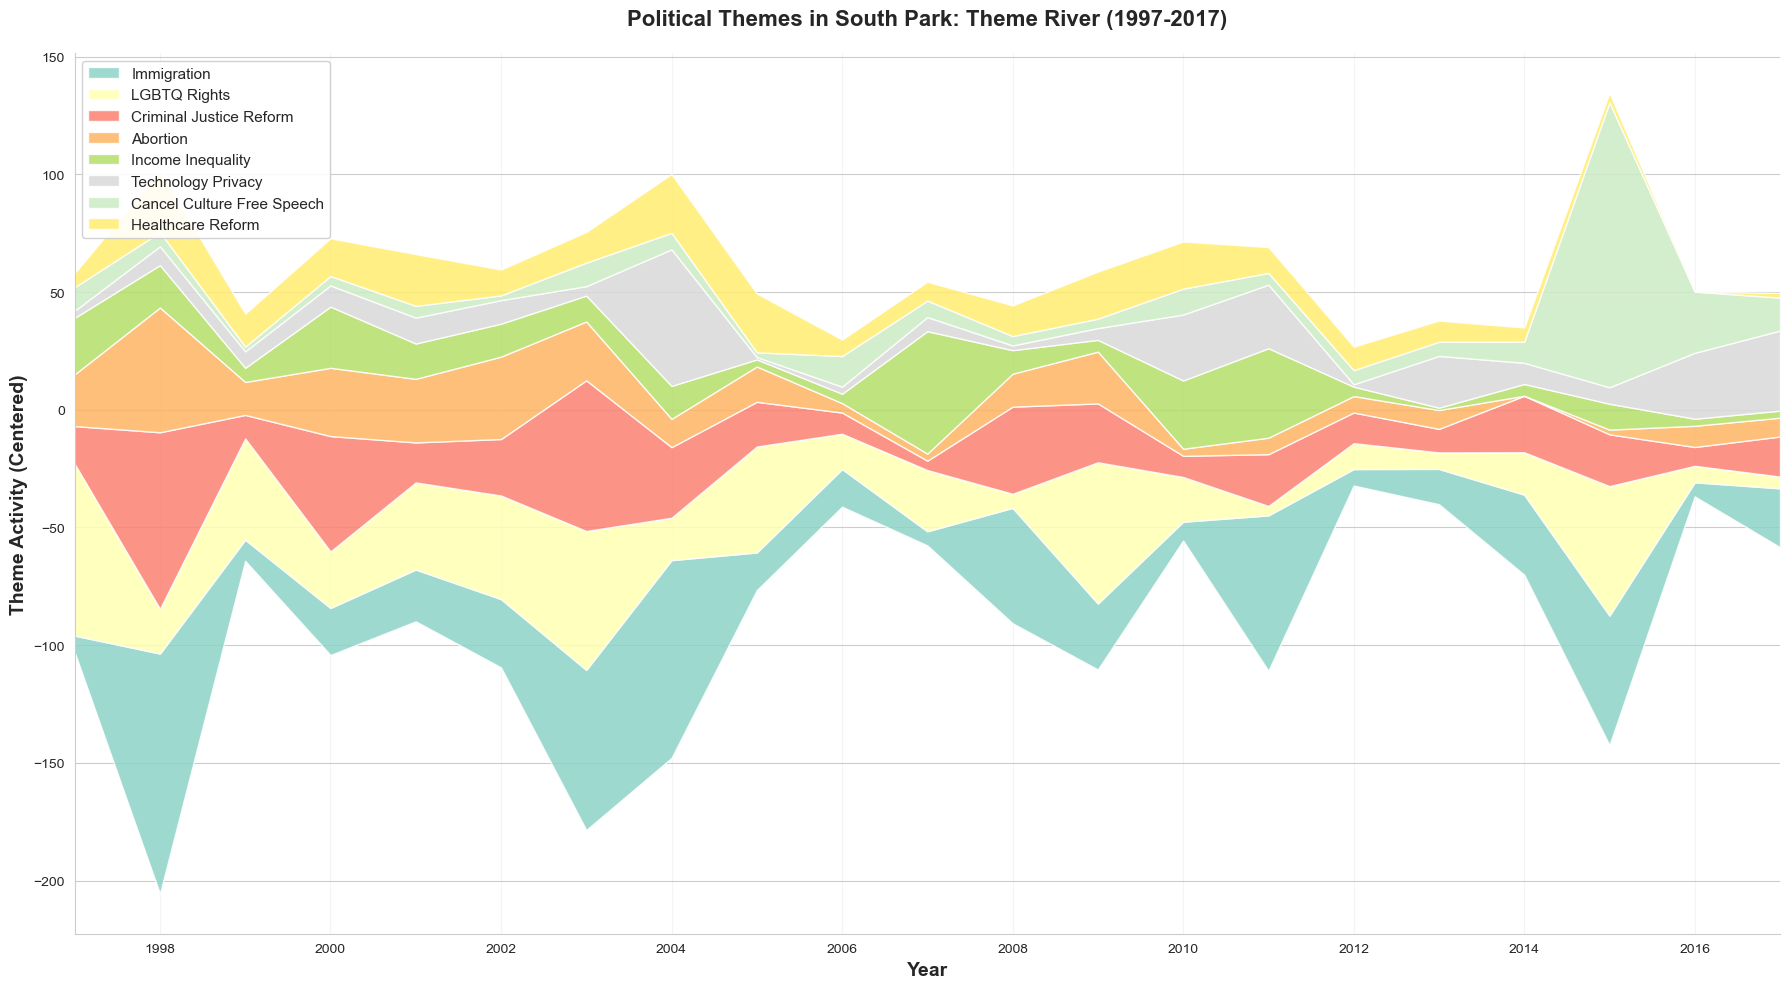

Theme River created with top 8 themes!


In [18]:
# Theme River with Top 8 Themes (streamgraph centered around baseline)
import numpy as np

# Select top 8 themes for clearer river visualization
top_8_themes = themes[:8]

# Prepare data
pivot_river = pivot_data_year[top_8_themes].fillna(0)

# Create the theme river with symmetric baseline (wiggle)
fig, ax = plt.subplots(figsize=(18, 10))

# Use stackplot with 'wiggle' baseline for centered stream effect
years = pivot_river.index
data_arrays = [pivot_river[col].values for col in top_8_themes]

# Create color palette
colors = plt.cm.Set3(np.linspace(0, 1, len(top_8_themes)))

ax.stackplot(years, *data_arrays, 
             labels=top_8_themes,
             colors=colors,
             alpha=0.85,
             baseline='wiggle')  # This creates the river effect!

ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Theme Activity (Centered)', fontsize=14, fontweight='bold')
ax.set_title('Political Themes in South Park: Theme River (1997-2017)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.set_xlim(1997, 2017)
ax.grid(True, alpha=0.2, axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format x-axis to show only integer years
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig('theme_river.png', dpi=200, bbox_inches='tight')
plt.show()

print("Theme River created with top 8 themes!")


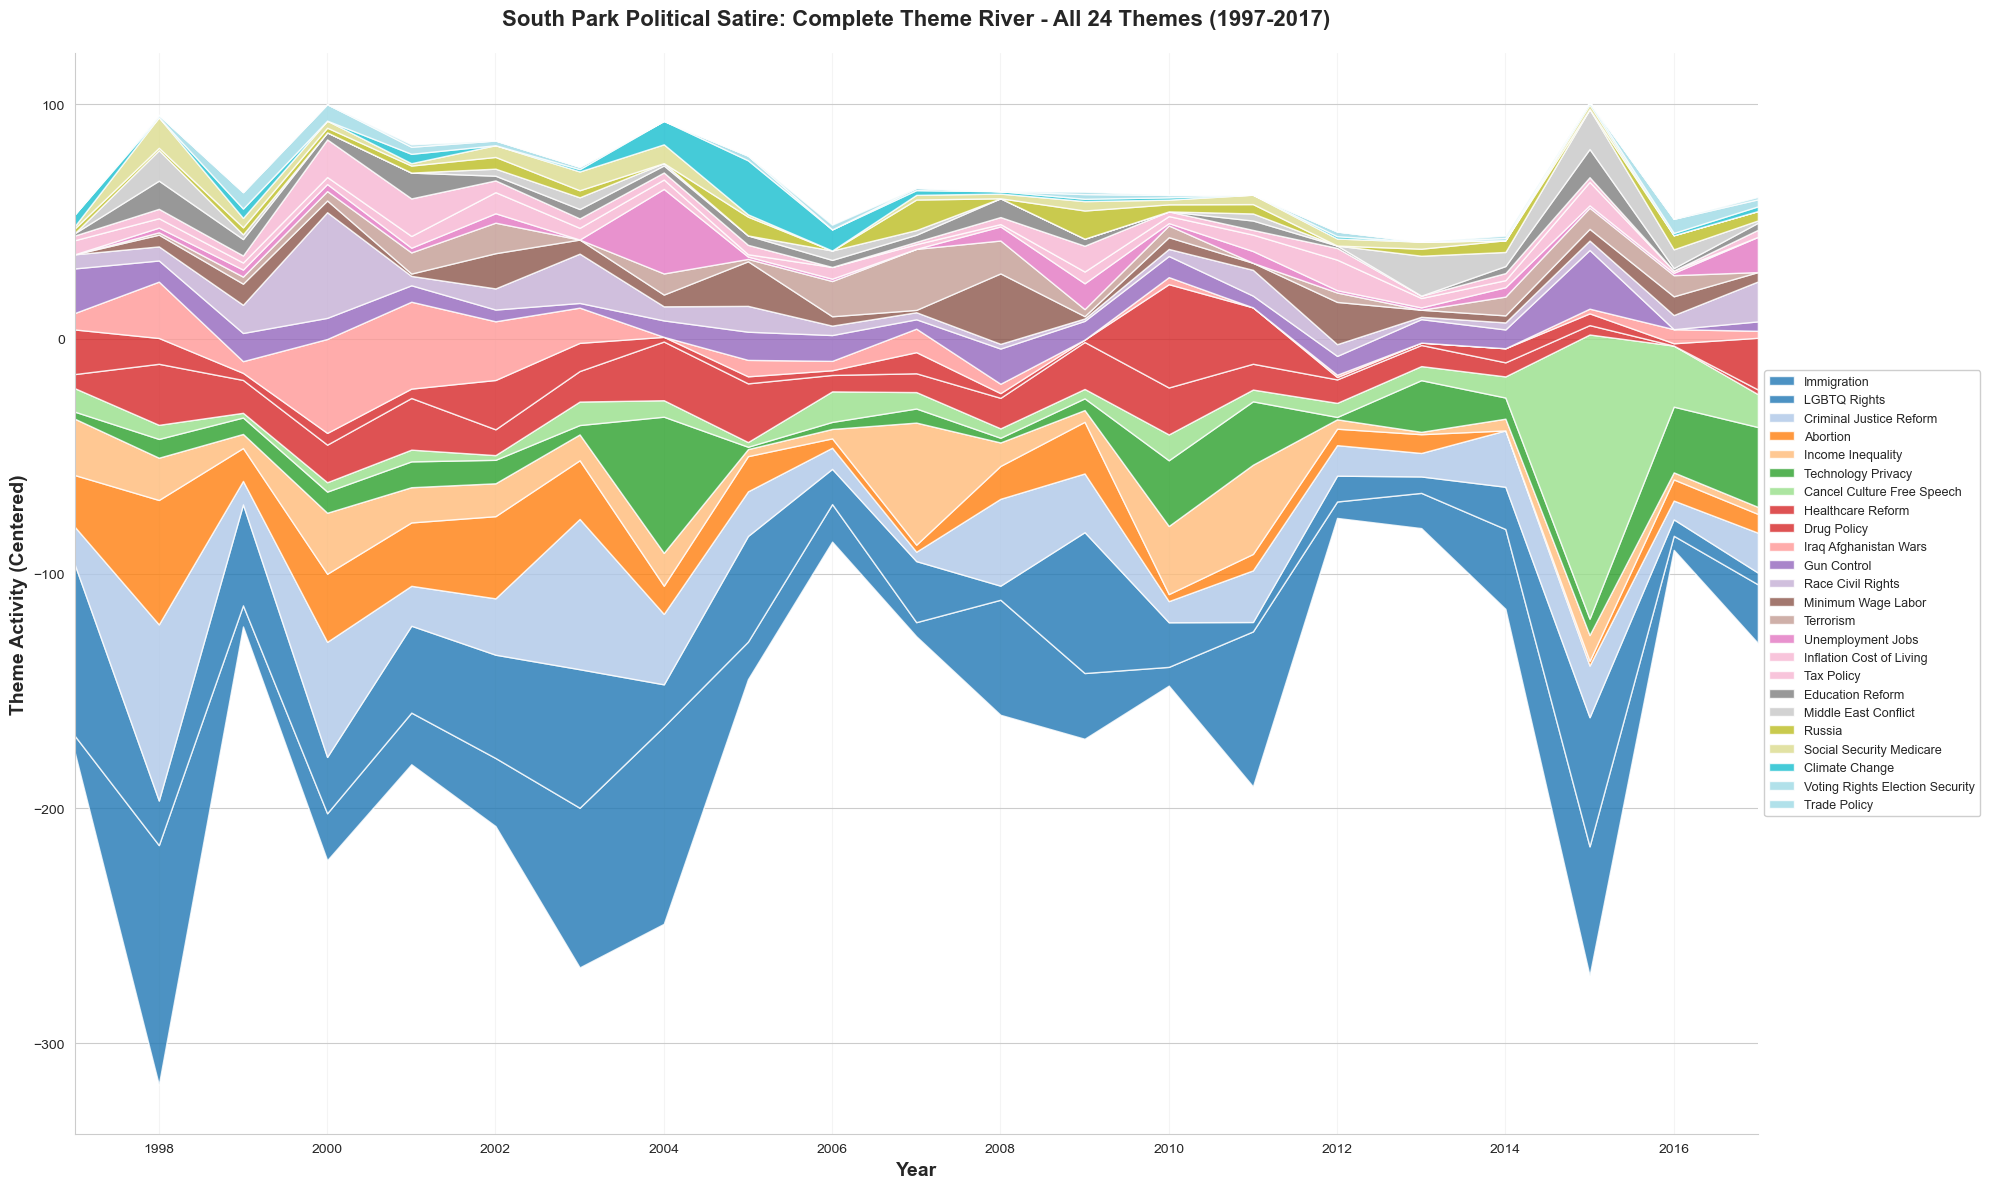

Complete Theme River created with all 24 themes!


In [19]:
# Theme River - All Themes Version (24 themes)
fig, ax = plt.subplots(figsize=(20, 12))

# Use all themes
data_arrays_all = [pivot_data_year[col].values for col in themes]

# Create diverse color palette
colors_all = plt.cm.tab20(np.linspace(0, 1, len(themes)))

ax.stackplot(pivot_data_year.index, *data_arrays_all,
             labels=themes,
             colors=colors_all,
             alpha=0.8,
             baseline='wiggle')

ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Theme Activity (Centered)', fontsize=14, fontweight='bold')
ax.set_title('South Park Political Satire: Complete Theme River - All 24 Themes (1997-2017)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9, framealpha=0.95)
ax.set_xlim(1997, 2017)
ax.grid(True, alpha=0.2, axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format x-axis to show only integer years
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig('theme_river_all.png', dpi=200, bbox_inches='tight')
plt.show()

print("Complete Theme River created with all 24 themes!")


In [20]:
# Interactive Theme River using Plotly
try:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    # Prepare data for plotly streamgraph
    fig = go.Figure()
    
    # Add traces for each theme (top 10 for interactivity)
    for theme in top_10_themes:
        fig.add_trace(go.Scatter(
            x=pivot_data_year.index,
            y=pivot_data_year[theme],
            name=theme,
            mode='lines',
            line=dict(width=0),
            stackgroup='one',
            groupnorm='percent',  # Normalize to percentage
            hovertemplate='<b>%{fullData.name}</b><br>Year: %{x}<br>Mentions: %{y}<extra></extra>'
        ))
    
    fig.update_layout(
        title='Interactive Theme River: South Park Political Themes (1997-2017)',
        title_font_size=18,
        xaxis_title='Year',
        yaxis_title='Percentage of Political Discourse',
        hovermode='x unified',
        height=700,
        showlegend=True,
        legend=dict(
            orientation="v",
            yanchor="middle",
            y=0.5,
            xanchor="left",
            x=1.02
        )
    )
    
    fig.write_html('theme_river_interactive.html')
    fig.show()
    
    print("Interactive theme river saved to: theme_river_interactive.html")
    
except ImportError:
    print("Plotly not installed. Skipping interactive visualization.")
    print("To create interactive visualizations, install plotly: pip install plotly")


Plotly not installed. Skipping interactive visualization.
To create interactive visualizations, install plotly: pip install plotly


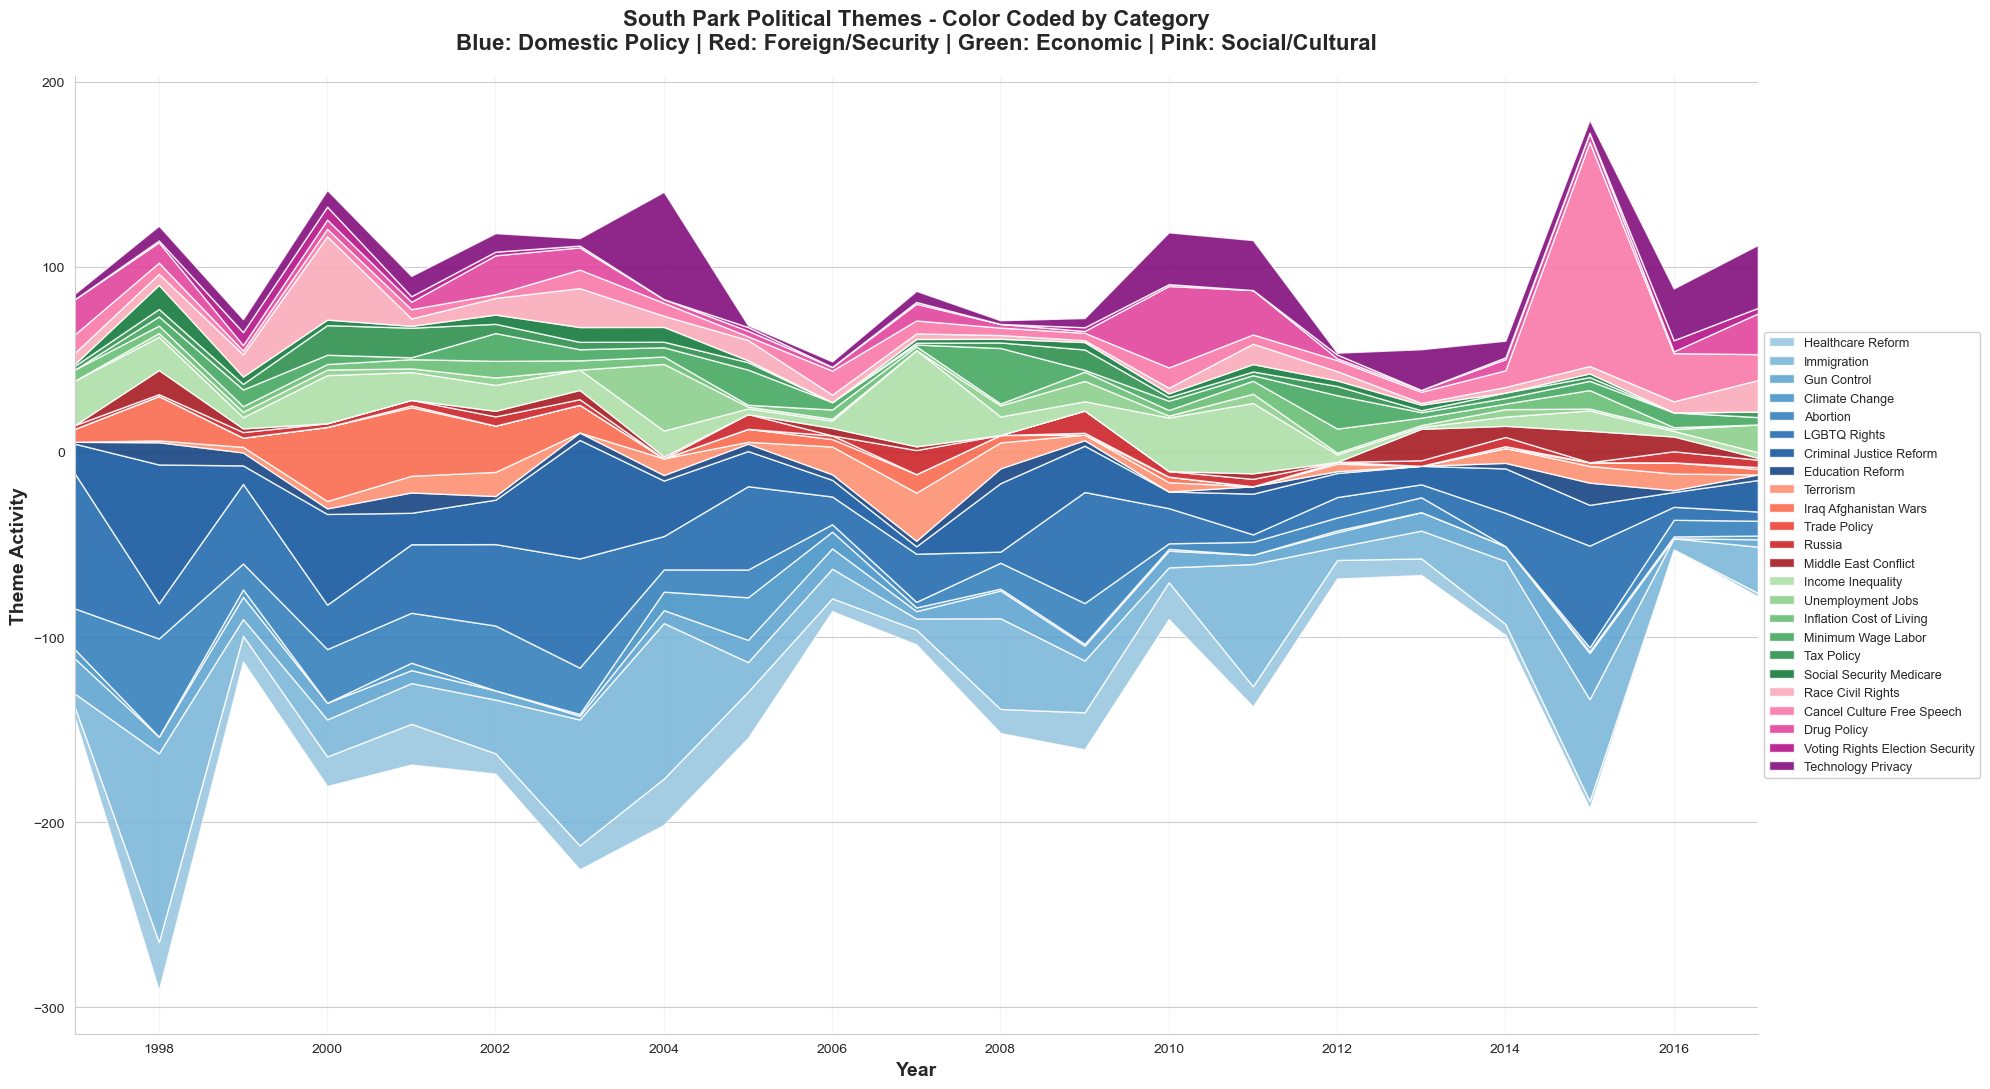

Categorized Theme River created with color-coded policy areas!


In [21]:
# Themed Color Scheme - Organize themes by category with coordinated colors
fig, ax = plt.subplots(figsize=(20, 11))

# Group themes by category with coordinated colors
domestic_themes = ['Healthcare Reform', 'Immigration', 'Gun Control', 'Climate Change', 
                   'Abortion', 'LGBTQ Rights', 'Criminal Justice Reform', 'Education Reform']
foreign_themes = ['Terrorism', 'Iraq Afghanistan Wars', 'Trade Policy', 'Russia', 'Middle East Conflict']
economic_themes = ['Income Inequality', 'Unemployment Jobs', 'Inflation Cost of Living', 
                   'Minimum Wage Labor', 'Tax Policy', 'Social Security Medicare']
cultural_themes = ['Race Civil Rights', 'Cancel Culture Free Speech', 'Drug Policy', 
                   'Voting Rights Election Security', 'Technology Privacy']

# Create custom color mapping
theme_colors = {}
# Domestic: Blues and purples
for i, theme in enumerate(domestic_themes):
    theme_colors[theme] = plt.cm.Blues(0.4 + i * 0.08)
# Foreign: Reds and oranges  
for i, theme in enumerate(foreign_themes):
    theme_colors[theme] = plt.cm.Reds(0.4 + i * 0.12)
# Economic: Greens
for i, theme in enumerate(economic_themes):
    theme_colors[theme] = plt.cm.Greens(0.35 + i * 0.1)
# Cultural: Purples and pinks
for i, theme in enumerate(cultural_themes):
    theme_colors[theme] = plt.cm.RdPu(0.35 + i * 0.13)

# Organize themes by category
ordered_themes = domestic_themes + foreign_themes + economic_themes + cultural_themes
colors_ordered = [theme_colors[t] for t in ordered_themes if t in pivot_data_year.columns]
data_ordered = [pivot_data_year[t].values for t in ordered_themes if t in pivot_data_year.columns]

ax.stackplot(pivot_data_year.index, *data_ordered,
             labels=[t for t in ordered_themes if t in pivot_data_year.columns],
             colors=colors_ordered,
             alpha=0.85,
             baseline='wiggle')

ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Theme Activity', fontsize=14, fontweight='bold')
ax.set_title('South Park Political Themes - Color Coded by Category\n' + 
             'Blue: Domestic Policy | Red: Foreign/Security | Green: Economic | Pink: Social/Cultural',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9, framealpha=0.95)
ax.set_xlim(1997, 2017)
ax.grid(True, alpha=0.2, axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format x-axis to show only integer years
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig('theme_river_categorized.png', dpi=200, bbox_inches='tight')
plt.show()

print("Categorized Theme River created with color-coded policy areas!")


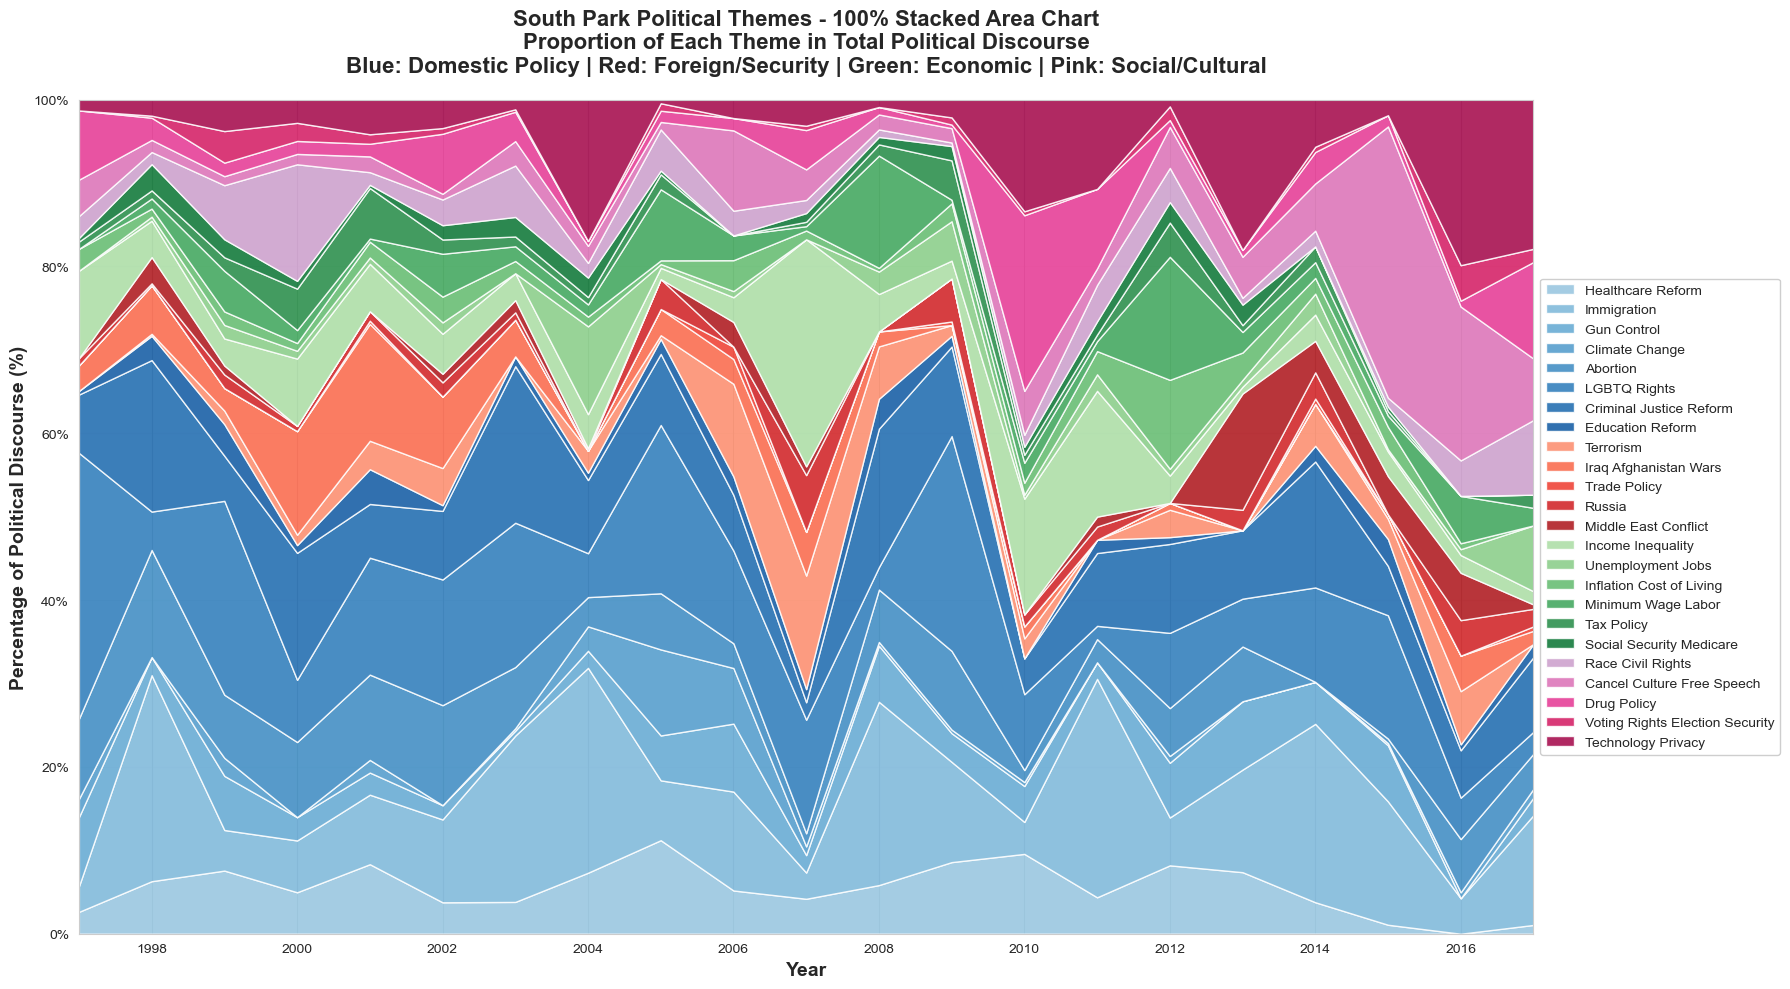

100% Stacked Area Chart created!
This shows what percentage of political discourse each theme represents at any given time.
The chart fills the entire vertical space (0-100%) to show proportions clearly.


In [22]:
# 100% Stacked Area Chart - Shows percentage of political discourse by theme
# This fills the entire box and shows proportions
# COPY AND PASTE THIS CODE INTO A NEW CELL IN YOUR WRANGLING NOTEBOOK

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# Aggregate by year and theme
year_theme_counts = df.groupby(['year', 'theme'])['count'].sum().reset_index()

# Pivot data for stacked area chart
pivot_data_year = year_theme_counts.pivot(index='year', columns='theme', values='count').fillna(0)

# Convert to percentages (each row sums to 100%)
pivot_percentage = pivot_data_year.div(pivot_data_year.sum(axis=1), axis=0) * 100

# Define theme categories and colors (matching your visualization)
domestic_themes = ['Healthcare Reform', 'Immigration', 'Gun Control', 'Climate Change', 
                   'Abortion', 'LGBTQ Rights', 'Criminal Justice Reform', 'Education Reform']
foreign_themes = ['Terrorism', 'Iraq Afghanistan Wars', 'Trade Policy', 'Russia', 'Middle East Conflict']
economic_themes = ['Income Inequality', 'Unemployment Jobs', 'Inflation Cost of Living', 
                   'Minimum Wage Labor', 'Tax Policy', 'Social Security Medicare']
cultural_themes = ['Race Civil Rights', 'Cancel Culture Free Speech', 'Drug Policy', 
                   'Voting Rights Election Security', 'Technology Privacy']

# Create color mapping
theme_colors = {}

# Domestic: Blues
for i, theme in enumerate(domestic_themes):
    t = i / max(1, len(domestic_themes) - 1) if len(domestic_themes) > 1 else 0.5
    theme_colors[theme] = plt.cm.Blues(0.4 + t * 0.45)

# Foreign: Reds
for i, theme in enumerate(foreign_themes):
    t = i / max(1, len(foreign_themes) - 1) if len(foreign_themes) > 1 else 0.5
    theme_colors[theme] = plt.cm.Reds(0.4 + t * 0.45)

# Economic: Greens
for i, theme in enumerate(economic_themes):
    t = i / max(1, len(economic_themes) - 1) if len(economic_themes) > 1 else 0.5
    theme_colors[theme] = plt.cm.Greens(0.35 + t * 0.5)

# Cultural: Purples/Pinks
for i, theme in enumerate(cultural_themes):
    t = i / max(1, len(cultural_themes) - 1) if len(cultural_themes) > 1 else 0.5
    theme_colors[theme] = plt.cm.PuRd(0.35 + t * 0.5)

# Organize themes by category
ordered_themes = domestic_themes + foreign_themes + economic_themes + cultural_themes
colors_ordered = [theme_colors[t] for t in ordered_themes if t in pivot_percentage.columns]
data_ordered = [pivot_percentage[t].values for t in ordered_themes if t in pivot_percentage.columns]

# Create the 100% stacked area chart
fig, ax = plt.subplots(figsize=(18, 10))

ax.stackplot(pivot_percentage.index, *data_ordered,
             labels=[t for t in ordered_themes if t in pivot_percentage.columns],
             colors=colors_ordered,
             alpha=0.85)

ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage of Political Discourse (%)', fontsize=14, fontweight='bold')
ax.set_title('South Park Political Themes - 100% Stacked Area Chart\n' + 
             'Proportion of Each Theme in Total Political Discourse\n' +
             'Blue: Domestic Policy | Red: Foreign/Security | Green: Economic | Pink: Social/Cultural',
             fontsize=16, fontweight='bold', pad=20)

# Set y-axis to 0-100%
ax.set_ylim(0, 100)
ax.set_xlim(1997, 2017)

# Add percentage formatting to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, framealpha=0.95)
ax.grid(True, alpha=0.2, axis='y')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig('themes_100percent_stacked.png', dpi=150, bbox_inches='tight')
plt.show()

print("100% Stacked Area Chart created!")
print("This shows what percentage of political discourse each theme represents at any given time.")
print("The chart fills the entire vertical space (0-100%) to show proportions clearly.")



---
## Normalized Data Analysis
The raw data is "bumpy" because different years have different numbers of episodes:
- Early seasons: 13-18 episodes per year
- Later seasons: 10 episodes per year
- Season 24: Only 2 episodes

**Normalization Solution**: Divide total mentions by episode count to get **mentions per episode**.
This shows the *intensity* of political content rather than just volume.


In [23]:
# Calculate episodes per year
episodes_per_year = df.groupby('year')['episode_order'].nunique().reset_index()
episodes_per_year.columns = ['year', 'num_episodes']

print("Episodes per year:")
print(episodes_per_year)

# Create normalized data: mentions per episode
year_theme_normalized = year_theme_counts.merge(episodes_per_year, on='year')
year_theme_normalized['normalized_count'] = year_theme_normalized['count'] / year_theme_normalized['num_episodes']

print("\n\nSample normalized data:")
print(year_theme_normalized.head(20))

# Create pivoted normalized data for visualizations
pivot_normalized = year_theme_normalized.pivot(index='year', columns='theme', values='normalized_count').fillna(0)

print(f"\n\nNormalized data shape: {pivot_normalized.shape}")
print(f"Year range: {pivot_normalized.index.min()} - {pivot_normalized.index.max()}")


Episodes per year:
    year  num_episodes
0   1997            13
1   1998            18
2   1999            17
3   2000            17
4   2001            14
5   2002            17
6   2003            15
7   2004            14
8   2005            14
9   2006            13
10  2007            14
11  2008            14
12  2009            14
13  2010            14
14  2011            14
15  2012            14
16  2013            10
17  2014            10
18  2015            10
19  2016             9
20  2017            10


Sample normalized data:
    year                       theme  count  num_episodes  normalized_count
0   1997                    Abortion     22            13          1.692308
1   1997  Cancel Culture Free Speech     10            13          0.769231
2   1997              Climate Change      5            13          0.384615
3   1997     Criminal Justice Reform     16            13          1.230769
4   1997                 Drug Policy     19            13          1.

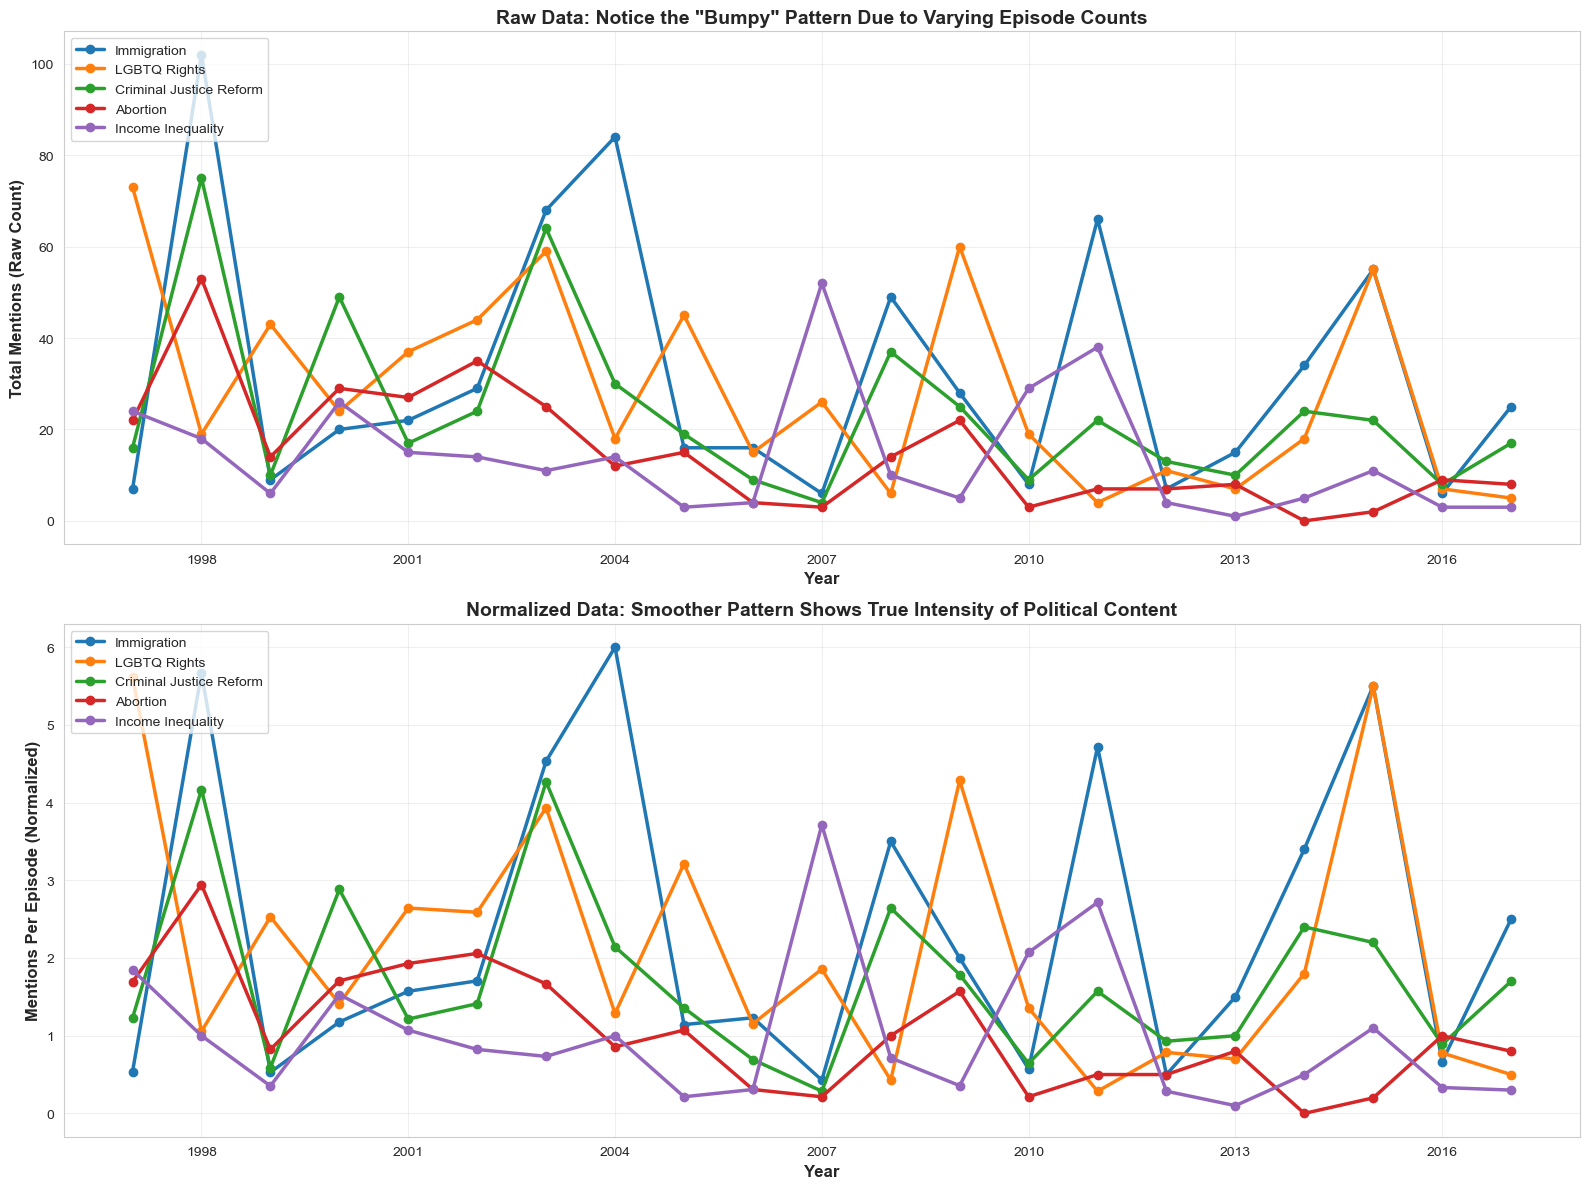

Comparison saved! Notice how normalization smooths the bumps.


In [24]:
# Comparison: Raw vs Normalized (Top 5 themes)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

top_5_themes = themes[:5]

# Plot 1: Raw counts
for theme in top_5_themes:
    theme_data = year_theme_counts[year_theme_counts['theme'] == theme]
    all_years = pd.DataFrame({'year': range(1997, 2018)})
    theme_data = all_years.merge(theme_data, on='year', how='left').fillna(0)
    ax1.plot(theme_data['year'], theme_data['count'], marker='o', linewidth=2.5, label=theme, markersize=6)

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Mentions (Raw Count)', fontsize=12, fontweight='bold')
ax1.set_title('Raw Data: Notice the "Bumpy" Pattern Due to Varying Episode Counts', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(1996, 2018)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Plot 2: Normalized (per episode)
for theme in top_5_themes:
    theme_data = year_theme_normalized[year_theme_normalized['theme'] == theme]
    all_years = pd.DataFrame({'year': range(1997, 2018)})
    theme_data = all_years.merge(theme_data[['year', 'normalized_count']], on='year', how='left').fillna(0)
    ax2.plot(theme_data['year'], theme_data['normalized_count'], marker='o', linewidth=2.5, label=theme, markersize=6)

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mentions Per Episode (Normalized)', fontsize=12, fontweight='bold')
ax2.set_title('Normalized Data: Smoother Pattern Shows True Intensity of Political Content', 
              fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(1996, 2018)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig('comparison_raw_vs_normalized.png', dpi=150, bbox_inches='tight')
plt.show()

print("Comparison saved! Notice how normalization smooths the bumps.")


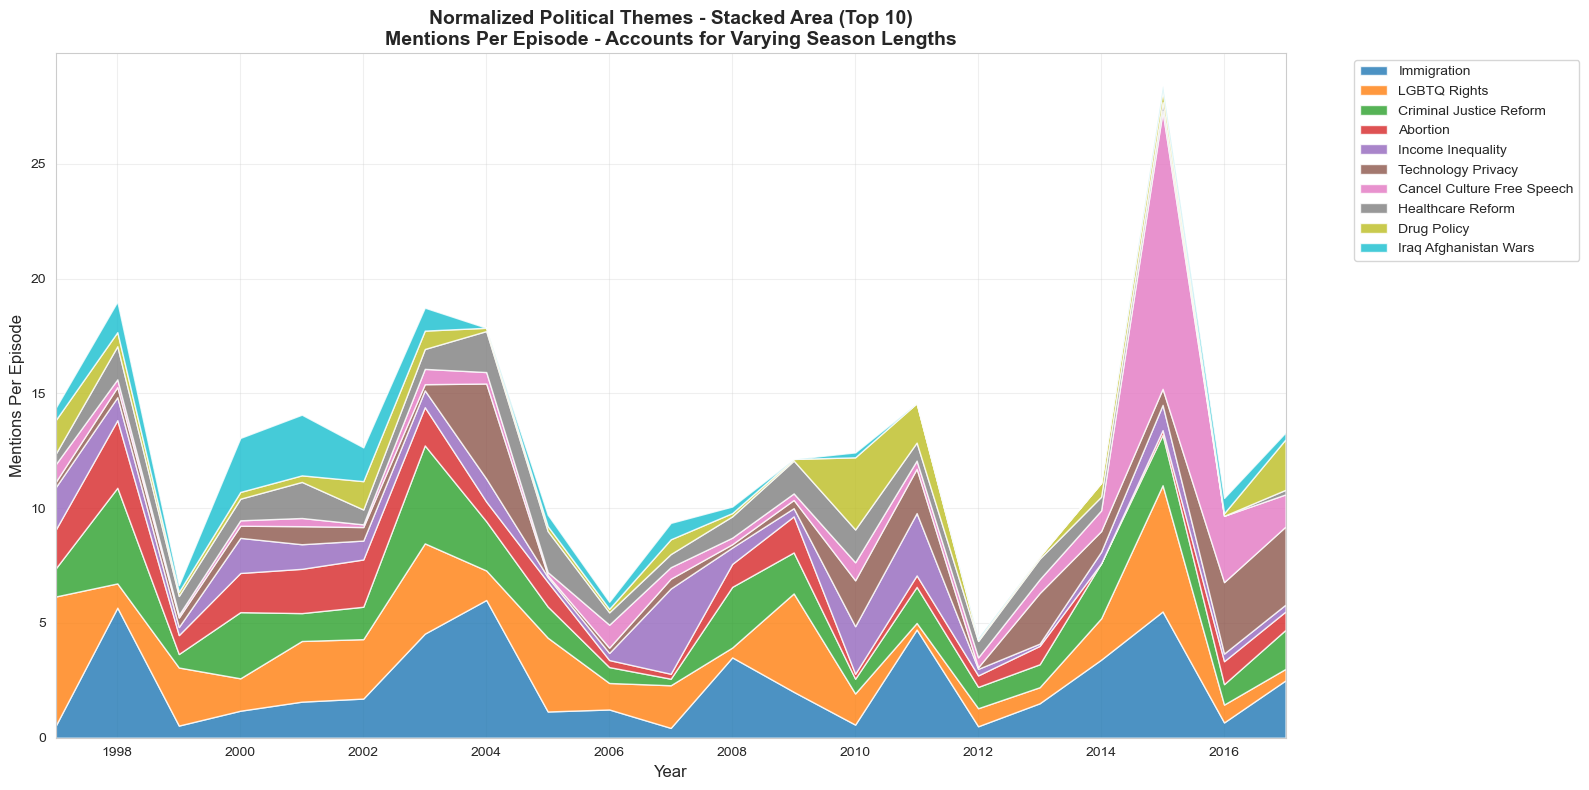

Much smoother! This shows the TRUE intensity of political content.


In [25]:
# Normalized Stacked Area Chart (Top 10 themes)
pivot_top10_normalized = pivot_normalized[top_10_themes]

plt.figure(figsize=(16, 8))
plt.stackplot(pivot_top10_normalized.index, 
              *[pivot_top10_normalized[col] for col in pivot_top10_normalized.columns],
              labels=pivot_top10_normalized.columns,
              alpha=0.8)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Mentions Per Episode', fontsize=12)
plt.title('Normalized Political Themes - Stacked Area (Top 10)\nMentions Per Episode - Accounts for Varying Season Lengths', 
          fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(1997, 2017)

# Format x-axis to show only integer years
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig('themes_stacked_area_normalized.png', dpi=150, bbox_inches='tight')
plt.show()

print("Much smoother! This shows the TRUE intensity of political content.")


In [26]:
# Summary: Impact of Normalization
print("=" * 90)
print("WHY NORMALIZATION MATTERS: Comparing Raw vs Normalized Intensity")
print("=" * 90)

# Calculate yearly totals (all themes combined)
yearly_raw = year_theme_counts.groupby('year')['count'].sum().reset_index()
yearly_raw.columns = ['year', 'total_raw']

yearly_normalized = year_theme_normalized.groupby('year')['normalized_count'].sum().reset_index()
yearly_normalized.columns = ['year', 'total_normalized']

comparison = yearly_raw.merge(yearly_normalized, on='year').merge(episodes_per_year, on='year')

print(f"\n{'Year':<6} {'Episodes':<10} {'Total Mentions':<16} {'Per Episode':<16} {'Rank (Raw)':<14} {'Rank (Norm)':<14}")
print("=" * 90)

comparison['rank_raw'] = comparison['total_raw'].rank(ascending=False)
comparison['rank_norm'] = comparison['total_normalized'].rank(ascending=False)

for _, row in comparison.iterrows():
    print(f"{int(row['year']):<6} {int(row['num_episodes']):<10} {int(row['total_raw']):<16} "
          f"{row['total_normalized']:>14.1f} {int(row['rank_raw']):<14} {int(row['rank_norm']):<14}")

print("=" * 90)

# Identify years where ranking changes significantly
comparison['rank_change'] = abs(comparison['rank_raw'] - comparison['rank_norm'])
big_changes = comparison.nlargest(3, 'rank_change')[['year', 'rank_raw', 'rank_norm', 'num_episodes']]

print("\n\nBiggest Ranking Changes After Normalization:")
for _, row in big_changes.iterrows():
    print(f"  {int(row['year'])}: Rank #{int(row['rank_raw'])} → #{int(row['rank_norm'])} "
          f"({int(row['num_episodes'])} episodes)")

print("\n💡 Key Insight: Years with many episodes appear more prominent in raw data,")
print("   but normalization reveals the true INTENSITY of political content per episode.")
print("=" * 90)


WHY NORMALIZATION MATTERS: Comparing Raw vs Normalized Intensity

Year   Episodes   Total Mentions   Per Episode      Rank (Raw)     Rank (Norm)   
1997   13         229                        17.6 10             9             
1998   18         413                        22.9 1              3             
1999   17         185                        10.9 16             19            
2000   17         322                        18.9 5              6             
2001   14         264                        18.9 7              7             
2002   17         292                        17.2 6              10            
2003   15         341                        22.7 4              4             
2004   14         342                        24.4 3              2             
2005   14         223                        15.9 11             12            
2006   13         135                        10.4 19             20            
2007   14         191                        13.6 14

---
## Outlier Removal: Filtering Episodes with Extreme Theme Focus

Some episodes focus heavily on a single theme (e.g., 44 mentions of LGBTQ Rights in one episode).
These outliers can skew the overall trends. Let's filter them out to see cleaner patterns.

**Method**: Set a threshold `n` - any episode with more than `n` mentions of a single theme is considered an outlier and that data point is removed.


In [27]:
# SET THRESHOLD HERE - Adjust this value to control outlier filtering
OUTLIER_THRESHOLD = 20  # Remove any episode-theme pair with more than this many mentions

print(f"Outlier Threshold: {OUTLIER_THRESHOLD} mentions per theme per episode")
print("=" * 80)

# Original data stats
print(f"\nOriginal data:")
print(f"  Total rows: {len(df)}")
print(f"  Max mentions in single episode-theme: {df['count'].max()}")
print(f"  Episode with max: {df.loc[df['count'].idxmax(), ['episode_name', 'theme', 'count']].to_dict()}")

# Filter out outliers
df_clean = df[df['count'] <= OUTLIER_THRESHOLD].copy()

print(f"\nAfter removing outliers (threshold={OUTLIER_THRESHOLD}):")
print(f"  Total rows: {len(df_clean)}")
print(f"  Rows removed: {len(df) - len(df_clean)} ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")
print(f"  Max mentions in single episode-theme: {df_clean['count'].max()}")

# Show what was removed
outliers_removed = df[df['count'] > OUTLIER_THRESHOLD].sort_values('count', ascending=False)
print(f"\nOutliers removed (top 10):")
print(outliers_removed[['episode_name', 'year', 'theme', 'count']].head(10).to_string(index=False))

# Recalculate aggregated data with clean dataset
year_theme_clean = df_clean.groupby(['year', 'theme'])['count'].sum().reset_index()
pivot_clean = year_theme_clean.pivot(index='year', columns='theme', values='count').fillna(0)

print(f"\n✓ Clean data prepared! Ready for visualization.")


Outlier Threshold: 20 mentions per theme per episode

Original data:
  Total rows: 1609
  Max mentions in single episode-theme: 66
  Episode with max: {'episode_name': 'Something Wall-Mart This Way Comes', 'theme': 'Immigration', 'count': 66}

After removing outliers (threshold=20):
  Total rows: 1580
  Rows removed: 29 (1.8%)
  Max mentions in single episode-theme: 20

Outliers removed (top 10):
                               episode_name  year                      theme  count
         Something Wall-Mart This Way Comes  2004                Immigration     66
                                   AWESOM-O  2004         Technology Privacy     56
                   It's Christmas in Canada  2003                Immigration     54
               Night of the Living Homeless  2007          Income Inequality     47
             Big Gay Al's Big Gay Boat Ride  1997               LGBTQ Rights     44
                  The Last of the Meheecans  2011                Immigration     42
            

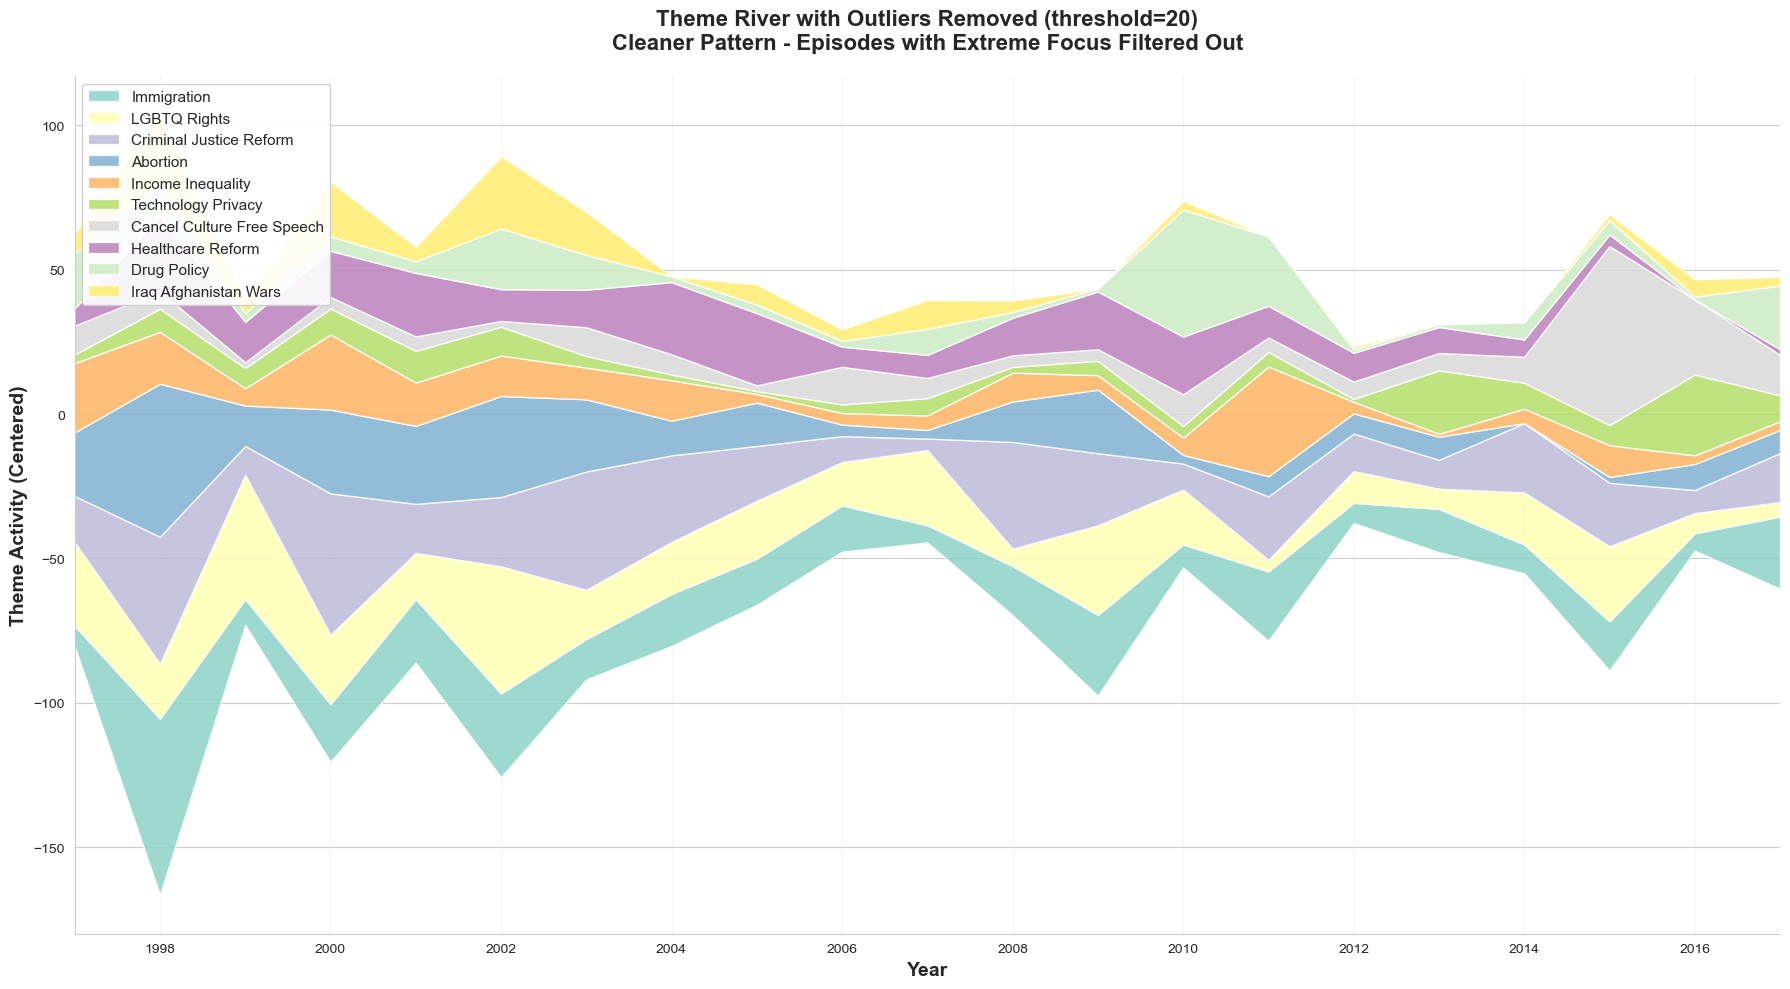

✓ Clean theme river saved as: theme_river_clean_threshold20.png
  Adjust OUTLIER_THRESHOLD above and re-run to experiment with different settings!


In [28]:
# Theme River with Outliers Removed (Top 10 Themes)
pivot_clean_top10 = pivot_clean[top_10_themes]

fig, ax = plt.subplots(figsize=(18, 10))

# Use stackplot with 'wiggle' baseline for centered stream effect
years = pivot_clean_top10.index
data_arrays_clean = [pivot_clean_top10[col].values for col in top_10_themes]

# Create color palette
colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_themes)))

ax.stackplot(years, *data_arrays_clean, 
             labels=top_10_themes,
             colors=colors,
             alpha=0.85,
             baseline='wiggle')

ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Theme Activity (Centered)', fontsize=14, fontweight='bold')
ax.set_title(f'Theme River with Outliers Removed (threshold={OUTLIER_THRESHOLD})\n' + 
             'Cleaner Pattern - Episodes with Extreme Focus Filtered Out', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.set_xlim(1997, 2017)
ax.grid(True, alpha=0.2, axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format x-axis to show only integer years
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig(f'theme_river_clean_threshold{OUTLIER_THRESHOLD}.png', dpi=200, bbox_inches='tight')
plt.show()

print(f"✓ Clean theme river saved as: theme_river_clean_threshold{OUTLIER_THRESHOLD}.png")
print(f"  Adjust OUTLIER_THRESHOLD above and re-run to experiment with different settings!")


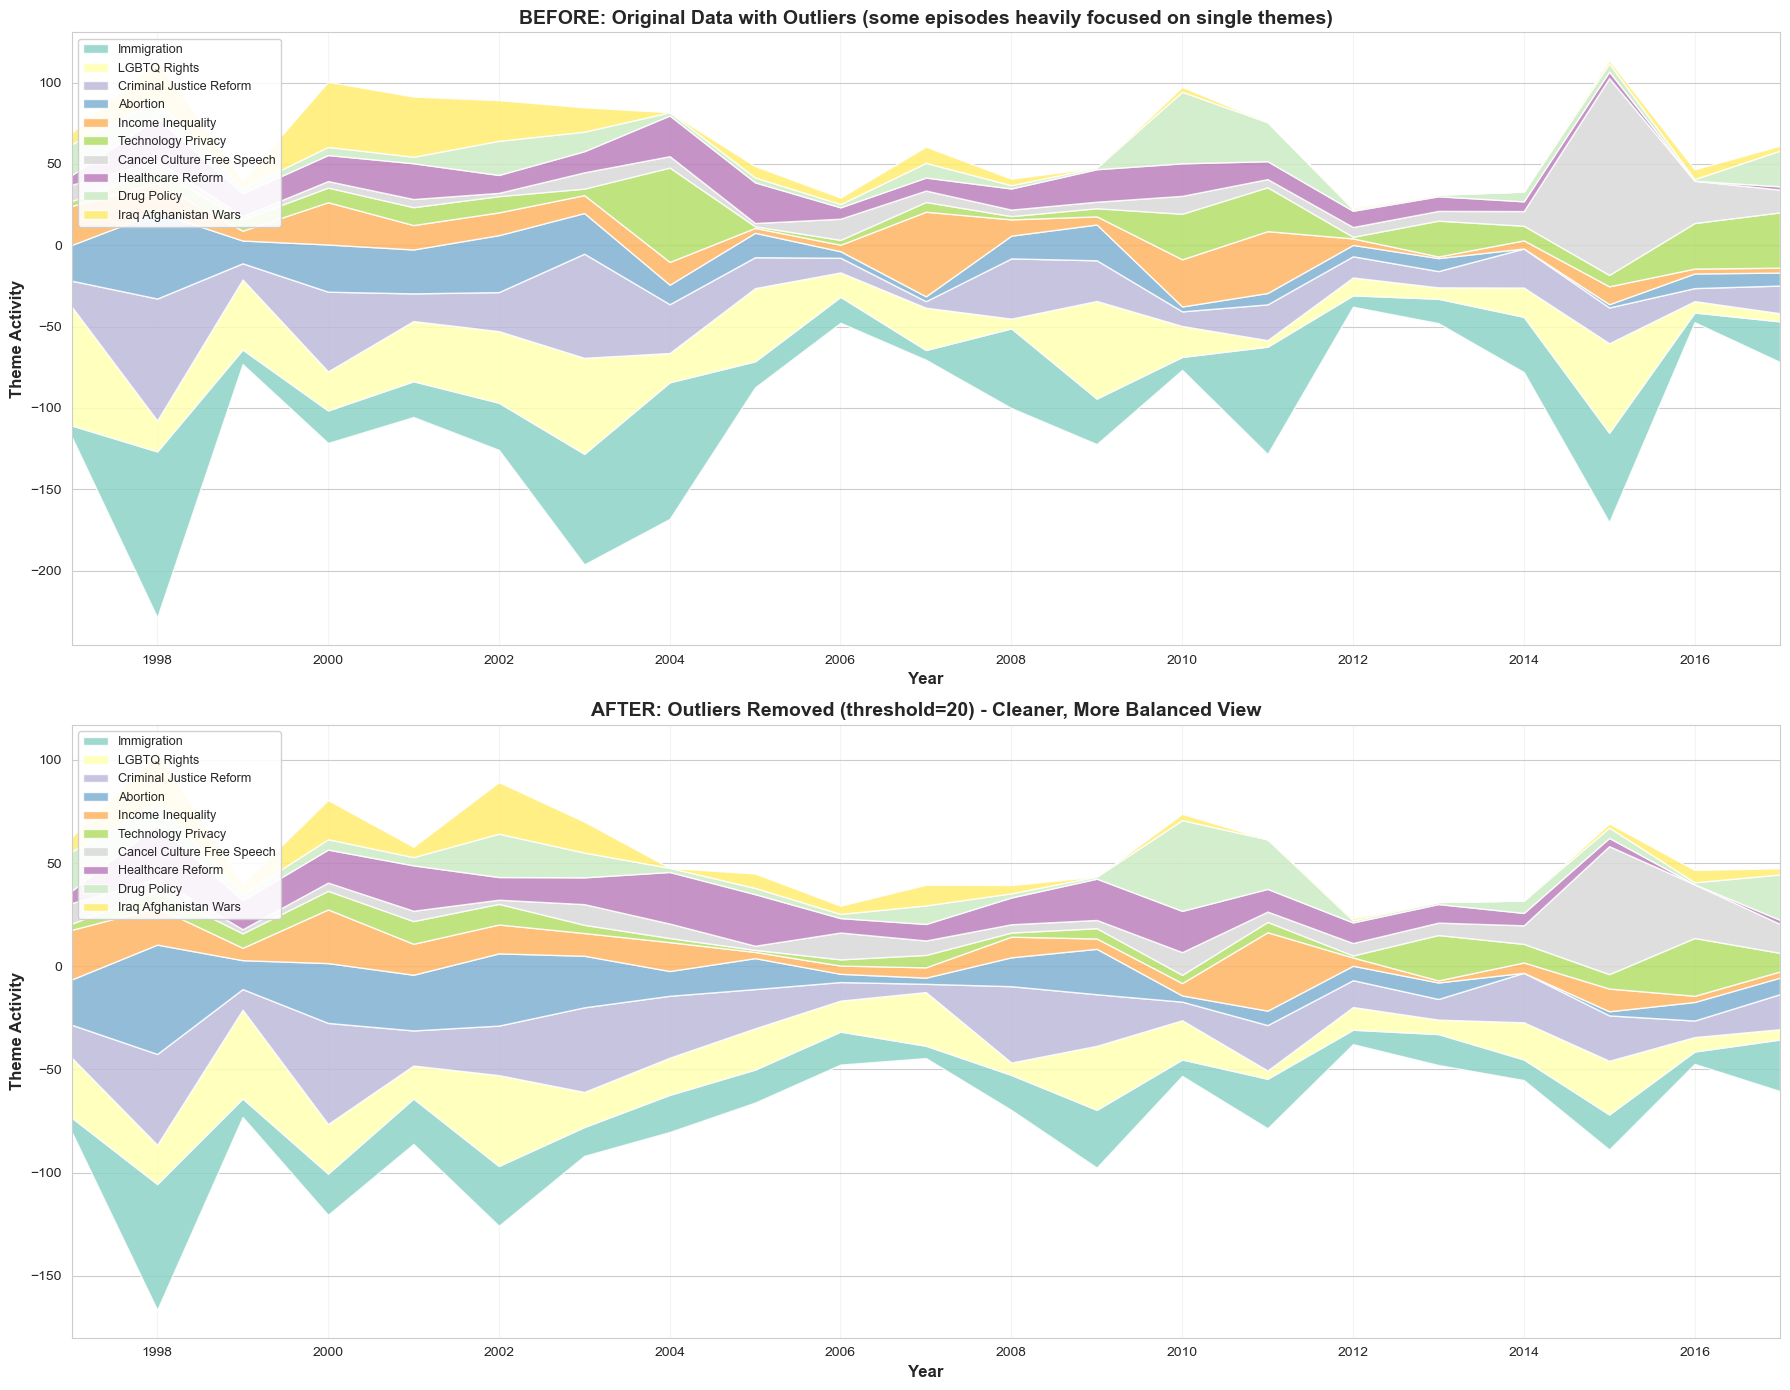

Comparison shows how removing outlier-heavy episodes changes the overall pattern!


In [29]:
# Comparison: Before and After Outlier Removal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 14))

# Plot 1: Original data
data_arrays_orig = [pivot_data_year[col].values for col in top_10_themes]
colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_themes)))

ax1.stackplot(pivot_data_year.index, *data_arrays_orig,
             labels=top_10_themes,
             colors=colors,
             alpha=0.85,
             baseline='wiggle')

ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Theme Activity', fontsize=12, fontweight='bold')
ax1.set_title('BEFORE: Original Data with Outliers (some episodes heavily focused on single themes)', 
             fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', fontsize=9, framealpha=0.9)
ax1.set_xlim(1997, 2017)
ax1.grid(True, alpha=0.2, axis='x')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Plot 2: Clean data
data_arrays_clean = [pivot_clean_top10[col].values for col in top_10_themes]

ax2.stackplot(pivot_clean_top10.index, *data_arrays_clean,
             labels=top_10_themes,
             colors=colors,
             alpha=0.85,
             baseline='wiggle')

ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Theme Activity', fontsize=12, fontweight='bold')
ax2.set_title(f'AFTER: Outliers Removed (threshold={OUTLIER_THRESHOLD}) - Cleaner, More Balanced View', 
             fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=9, framealpha=0.9)
ax2.set_xlim(1997, 2017)
ax2.grid(True, alpha=0.2, axis='x')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig(f'comparison_outliers_threshold{OUTLIER_THRESHOLD}.png', dpi=150, bbox_inches='tight')
plt.show()

print("Comparison shows how removing outlier-heavy episodes changes the overall pattern!")


In [30]:
# Impact Analysis: What changed after removing outliers?
print("=" * 90)
print(f"IMPACT OF OUTLIER REMOVAL (Threshold = {OUTLIER_THRESHOLD})")
print("=" * 90)

# Calculate total mentions by year before and after
yearly_orig = year_theme_counts.groupby('year')['count'].sum()
yearly_clean = year_theme_clean.groupby('year')['count'].sum()

comparison_df = pd.DataFrame({
    'Original': yearly_orig,
    'Clean': yearly_clean,
    'Difference': yearly_orig - yearly_clean,
    'Pct_Removed': ((yearly_orig - yearly_clean) / yearly_orig * 100)
}).round(1)

print(f"\n{'Year':<6} {'Original':<12} {'Clean':<12} {'Removed':<12} {'% Removed':<12}")
print("-" * 90)
for year, row in comparison_df.iterrows():
    print(f"{int(year):<6} {int(row['Original']):<12} {int(row['Clean']):<12} "
          f"{int(row['Difference']):<12} {row['Pct_Removed']:>10.1f}%")

print("\n" + "=" * 90)
print("\n📊 Key Insights:")
print(f"   • Years most affected by outlier removal: {comparison_df.nlargest(3, 'Pct_Removed').index.tolist()}")
print(f"   • Average % of data removed: {comparison_df['Pct_Removed'].mean():.1f}%")
print(f"   • Total mentions removed: {comparison_df['Difference'].sum():.0f}")
print("\n💡 Tip: Try different OUTLIER_THRESHOLD values (10, 15, 20, 30) to see how it affects the pattern!")
print("=" * 90)


IMPACT OF OUTLIER REMOVAL (Threshold = 20)

Year   Original     Clean        Removed      % Removed   
------------------------------------------------------------------------------------------
1997   229          185          44                 19.2%
1998   413          341          72                 17.4%
1999   185          185          0                   0.0%
2000   322          276          46                 14.3%
2001   264          211          53                 20.1%
2002   292          292          0                   0.0%
2003   341          222          119                34.9%
2004   342          194          148                43.3%
2005   223          176          47                 21.1%
2006   135          135          0                   0.0%
2007   191          144          47                 24.6%
2008   223          163          60                 26.9%
2009   233          204          29                 12.4%
2010   209          162          47                 

In [31]:
# Summary of Theme River visualizations created
print("=" * 80)
print("THEME RIVER VISUALIZATIONS CREATED")
print("=" * 80)
print("\n1. theme_river.png")
print("   - Top 8 themes with clean, flowing design")
print("   - Uses 'wiggle' baseline for symmetric river effect")
print("\n2. theme_river_all.png")
print("   - All 24 themes in one comprehensive visualization")
print("   - Shows complete political discourse landscape")
print("\n3. theme_river_categorized.png")
print("   - Color-coded by policy category:")
print("     • Blue: Domestic Policy (healthcare, immigration, guns, etc.)")
print("     • Red: Foreign/Security (terrorism, wars, Russia, etc.)")
print("     • Green: Economic (inequality, jobs, wages, etc.)")
print("     • Pink: Social/Cultural (race, cancel culture, drugs, etc.)")
print("\n4. theme_river_interactive.html (if Plotly installed)")
print("   - Interactive HTML file you can explore in a browser")
print("   - Hover over streams to see exact values")
print("=" * 80)


THEME RIVER VISUALIZATIONS CREATED

1. theme_river.png
   - Top 8 themes with clean, flowing design
   - Uses 'wiggle' baseline for symmetric river effect

2. theme_river_all.png
   - All 24 themes in one comprehensive visualization
   - Shows complete political discourse landscape

3. theme_river_categorized.png
   - Color-coded by policy category:
     • Blue: Domestic Policy (healthcare, immigration, guns, etc.)
     • Red: Foreign/Security (terrorism, wars, Russia, etc.)
     • Green: Economic (inequality, jobs, wages, etc.)
     • Pink: Social/Cultural (race, cancel culture, drugs, etc.)

4. theme_river_interactive.html (if Plotly installed)
   - Interactive HTML file you can explore in a browser
   - Hover over streams to see exact values


In [32]:
# Summary statistics table
print("=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)
print(f"\nTotal themes tracked: {len(themes)}")
print(f"Total seasons analyzed: {df['season'].nunique()}")
print(f"Total episodes analyzed: {df['episode_order'].nunique()}")
print(f"Year range: {df['year'].min()}-{df['year'].max()}")

print("\n\nTop 5 Themes by Total Mentions:")
print(theme_totals.head())

print("\n\nThemes by Peak Season Activity:")
for theme in top_10_themes:
    theme_data = season_theme_counts[season_theme_counts['theme'] == theme]
    peak_season = theme_data.loc[theme_data['count'].idxmax()]
    print(f"{theme:40s}: Season {int(peak_season['season']):2d} ({int(peak_season['count'])} mentions)")

print("\nNote: Year data loaded directly from theme_timeseries.csv")
print("=" * 80)


SUMMARY STATISTICS

Total themes tracked: 24
Total seasons analyzed: 21
Total episodes analyzed: 285
Year range: 1997-2017


Top 5 Themes by Total Mentions:
theme
Immigration                672
LGBTQ Rights               595
Criminal Justice Reform    504
Abortion                   319
Income Inequality          296
Name: count, dtype: int64


Themes by Peak Season Activity:
Immigration                             : Season  2 (102 mentions)
LGBTQ Rights                            : Season  1 (73 mentions)
Criminal Justice Reform                 : Season  2 (75 mentions)
Abortion                                : Season  2 (53 mentions)
Income Inequality                       : Season 11 (52 mentions)
Technology Privacy                      : Season  8 (58 mentions)
Cancel Culture Free Speech              : Season 19 (121 mentions)
Healthcare Reform                       : Season  2 (26 mentions)
Drug Policy                             : Season 14 (44 mentions)
Iraq Afghanistan Wars     